In [2]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

In [3]:
# importing dataset and assiging it to xls
xls = pd.ExcelFile(r"C:\Users\JOHN TOJO\Desktop\Customer_retention_dataset\customer_retention_dataset.xlsx")
# importing excel sheet_1 datasheet
df= pd.read_excel(xls, 'datasheet')
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


using datasheet as datas are used for analysing

In [4]:
# using this to see all columns name and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# looking at column names
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [6]:
columns = ['Gender','Age','City','Pincode','Shopping_Since','Shopping_Frequency_Past_Year','Mode_Of_Internet_Access','Device_Used',
           'Screen_Size','OS', 'Browser_Used','Channel_First_Used','Login_Mode','Time_Explored','Payment_Mode','Abandon_Frequency',
          'Abandon_Reason','Content_Readability','Similar_Product_Info','Seller_Product_Info','Product_Info_Clarity','Navigation_Ease',
          'Loading_Processing_Speed','User_Friendly_Interface','Convenient_Payment_Mode','Timely_Fulfilment_Trust','Customer_Support',
          'Customer_Privacy_Guarantee','Channel_Responses','Benefits','happiness','Flexibility','Return_Replacement_Policy','Loyalty_Programs',
          'Satisfactory_Info','Customer_Satisfaction','Net_Benefit_Satisfaction','Customer_Trust','Product_Categories','Relevant_Product_Info','Monetary_Savings',
          'Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Role_Fulfilment','Money_Worth','Shopped_From','Easy_Web_App',
           'Visual_Appeal_Layput','Product_Variety','Complete_Product_Info','Fast_Load_Web_App','Reliable_Web_App','Quick_Purchase','Payment_Options_Availability',
           'Fast_Delivery','Customer_Privacy','Financial_Security','Perceived_Trust_Worthiness','Multichannel_Assistance','Login_Time_During_Offers','Display_Time_During_Offers',
           'Late_Price_Declare','Long_Loading_Time','Limited_Payment_Mode','Late_Delivery','Web_App_Design_Change','Page_Disruption','Web_App_Efficiency',
           'Recommendation']

df.columns = columns

#### checking nulls

In [7]:
df.isnull().sum().sum()

0

no nulls are present

#### duplicates

In [8]:
df.duplicated().sum()

166

#### checking datatype

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        269 non-null    object
 1   Age                           269 non-null    object
 2   City                          269 non-null    object
 3   Pincode                       269 non-null    int64 
 4   Shopping_Since                269 non-null    object
 5   Shopping_Frequency_Past_Year  269 non-null    object
 6   Mode_Of_Internet_Access       269 non-null    object
 7   Device_Used                   269 non-null    object
 8   Screen_Size                   269 non-null    object
 9   OS                            269 non-null    object
 10  Browser_Used                  269 non-null    object
 11  Channel_First_Used            269 non-null    object
 12  Login_Mode                    269 non-null    object
 13  Time_Explored       

- Pincode is Int type 
- rest all are object data type

#### Checking for unique values in each columns

In [10]:
#To check unique values

df.nunique()

Gender                           2
Age                              5
City                            11
Pincode                         39
Shopping_Since                   5
Shopping_Frequency_Past_Year     6
Mode_Of_Internet_Access          4
Device_Used                      4
Screen_Size                      4
OS                               3
Browser_Used                     4
Channel_First_Used               3
Login_Mode                       5
Time_Explored                    5
Payment_Mode                     3
Abandon_Frequency                4
Abandon_Reason                   5
Content_Readability              4
Similar_Product_Info             4
Seller_Product_Info              5
Product_Info_Clarity             4
Navigation_Ease                  4
Loading_Processing_Speed         5
User_Friendly_Interface          5
Convenient_Payment_Mode          3
Timely_Fulfilment_Trust          4
Customer_Support                 4
Customer_Privacy_Guarantee       3
Channel_Responses   

In [11]:
df["Shopping_Frequency_Past_Year"].unique()

array(['31-40 times', '41 times and above', 'Less than 10 times',
       '11-20 times', '21-30 times', '42 times and above'], dtype=object)

In [12]:
# combining 42 times and above to 41 times and above
df["Shopping_Frequency_Past_Year"]=df["Shopping_Frequency_Past_Year"].replace('42 times and above','41 times and above')

In [13]:
df["Mode_Of_Internet_Access"].unique()

array(['Dial-up', 'Wi-Fi', 'Mobile Internet', 'Mobile internet'],
      dtype=object)

In [14]:
# combining Mobile internet to  Mobile Internet
df["Mode_Of_Internet_Access"]=df["Mode_Of_Internet_Access"].replace('Mobile internet','Mobile Internet')

#### seperating numerical and categorical data type

In [15]:
numericalCol=df.select_dtypes(include=np.number).columns
print("The numerical columns are:",numericalCol)
print('\n')
objectColumns=df.select_dtypes(include=np.object).columns
print("The categorical columns are:",objectColumns)

The numerical columns are: Index(['Pincode'], dtype='object')


The categorical columns are: Index(['Gender', 'Age', 'City', 'Shopping_Since',
       'Shopping_Frequency_Past_Year', 'Mode_Of_Internet_Access',
       'Device_Used', 'Screen_Size', 'OS', 'Browser_Used',
       'Channel_First_Used', 'Login_Mode', 'Time_Explored', 'Payment_Mode',
       'Abandon_Frequency', 'Abandon_Reason', 'Content_Readability',
       'Similar_Product_Info', 'Seller_Product_Info', 'Product_Info_Clarity',
       'Navigation_Ease', 'Loading_Processing_Speed',
       'User_Friendly_Interface', 'Convenient_Payment_Mode',
       'Timely_Fulfilment_Trust', 'Customer_Support',
       'Customer_Privacy_Guarantee', 'Channel_Responses', 'Benefits',
       'happiness', 'Flexibility', 'Return_Replacement_Policy',
       'Loyalty_Programs', 'Satisfactory_Info', 'Customer_Satisfaction',
       'Net_Benefit_Satisfaction', 'Customer_Trust', 'Product_Categories',
       'Relevant_Product_Info', 'Monetary_Savings', 'Patro

#### checking how the data is defined statistically for numerical continuous datas and visualising

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pincode,269.0,220465.747212,140524.341051,110008.0,122018.0,201303.0,201310.0,560037.0


201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
132036     8
122018     8
560037     8
110008     7
110011     7
201306     7
110014     6
110018     6
201305     5
201008     5
201009     5
201312     5
244001     5
530068     5
122009     4
201001     4
560003     4
201304     4
110009     4
201303     4
560002     4
560018     4
110042     4
110030     4
201005     4
110039     4
560013     3
203001     2
203202     1
560001     1
203207     1
Name: Pincode, dtype: int64


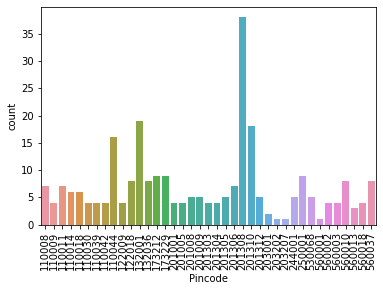

In [17]:
print(df['Pincode'].value_counts())
sns.countplot(df['Pincode'])
plt.xticks(rotation=90)
plt.show()

- 201308 has the highest no of online purchasers
- 203202, 560001 and 203207 has the least no of online purchasers     1


#### checking how the data is defined statistically for categorical datas`and visualising

In [18]:
df[objectColumns].describe(include=['O'])

,Gender,Age,City,Shopping_Since,Shopping_Frequency_Past_Year,Mode_Of_Internet_Access,Device_Used,Screen_Size,OS,Browser_Used,Channel_First_Used,Login_Mode,Time_Explored,Payment_Mode,Abandon_Frequency,Abandon_Reason,Content_Readability,Similar_Product_Info,Seller_Product_Info,Product_Info_Clarity,Navigation_Ease,Loading_Processing_Speed,User_Friendly_Interface,Convenient_Payment_Mode,Timely_Fulfilment_Trust,Customer_Support,Customer_Privacy_Guarantee,Channel_Responses,Benefits,happiness,Flexibility,Return_Replacement_Policy,Loyalty_Programs,Satisfactory_Info,Customer_Satisfaction,Net_Benefit_Satisfaction,Customer_Trust,Product_Categories,Relevant_Product_Info,Monetary_Savings,Patronizing_Convenience,Adventure_Sense,Social_Status,Gratification,Role_Fulfilment,Money_Worth,Shopped_From,Easy_Web_App,Visual_Appeal_Layput,Product_Variety,Complete_Product_Info,Fast_Load_Web_App,Reliable_Web_App,Quick_Purchase,Payment_Options_Availability,Fast_Delivery,Customer_Privacy,Financial_Security,Perceived_Trust_Worthiness,Multichannel_Assistance,Login_Time_During_Offers,Display_Time_During_Offers,Late_Price_Declare,Long_Loading_Time,Limited_Payment_Mode,Late_Delivery,Web_App_Design_Change,Page_Disruption,Web_App_Efficiency,Recommendation
count,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269
unique,2,5,11,5,5,3,4,4,3,4,3,5,5,3,4,5,4,4,5,4,4,5,5,3,4,4,3,4,5,5,4,3,5,3,3,4,5,4,4,4,3,5,5,5,5,3,9,10,10,9,11,10,10,9,11,6,11,11,9,10,10,10,8,11,8,6,7,8,8,8
top,Female,31-40 years,Delhi,Above 4 years,Less than 10 times,Mobile Internet,Smartphone,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,more than 15 mins,Credit/Debit cards,Sometimes,Better alternative offer,Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Strongly agree (5),Agree (4),Agree (4),indifferent (3),indifferent (3),Agree (4),Agree (4),"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com",Amazon.in,Amazon.in,Amazon.com,"Amazon.in, Flipkart.com",Amazon.in,Amazon.in,Amazon.in,Amazon.in,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal",Amazon.in,"Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Snapdeal.com,Paytm.com,Amazon.in,Amazon.in,Amazon.in,Amazon.in
freq,181,81,58,98,114,189,141,134,122,216,230,87,123,148,171,133,164,116,101,132,141,115,189,159,141,194,185,149,105,86,146,198,115,133,175,164,122,111,135,148,138,101,100,101,88,149,82,64,87,130,100,51,61,66,65,107,71,51,76,61,57,60,75,61,87,72,96,53,94,79


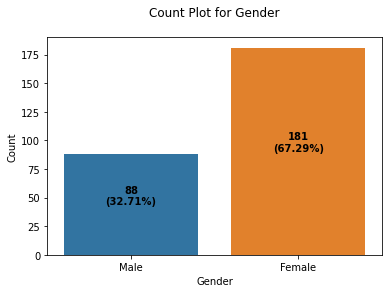

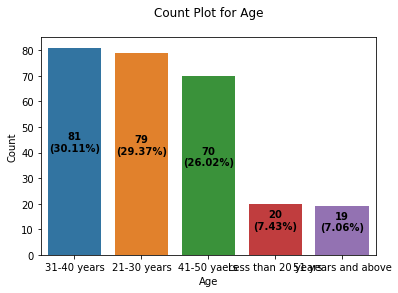

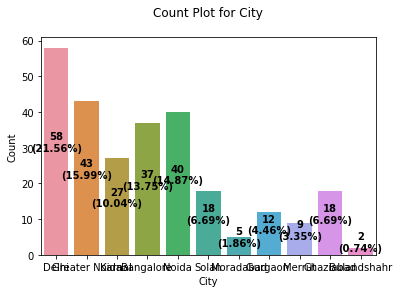

In [52]:
# listing all Categorical data and plotting 
for x in objectColumns[0:3]:

    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.show()

- Gender
    - most of the customers are female, almost double the ratio of male customers


- Age    
    - the age group 31-40 has the most no of customers, followed by 21-30 age group

- City
    - majority of the customers reside in Delhi, followed by Greater Noida and Noida

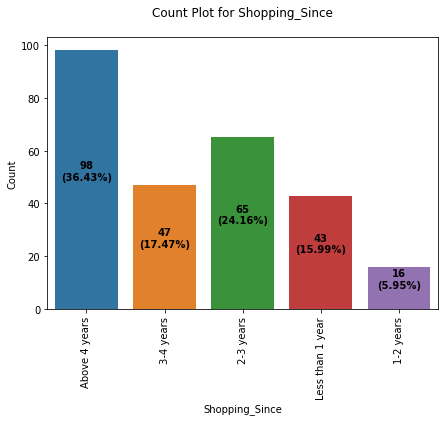

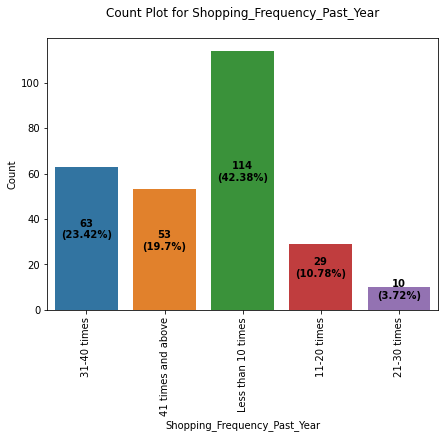

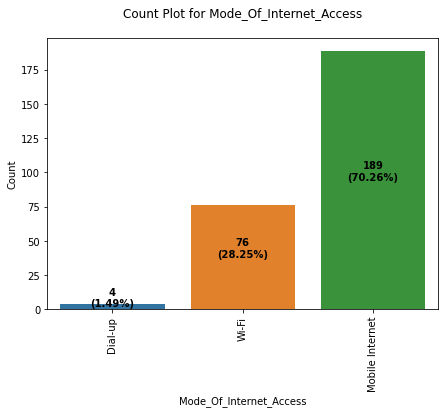

In [53]:
# listing all Categorical data and plotting 
for x in objectColumns[3:6]:

    plt.figure(figsize=(7,5))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

-  Shopping_Since   
    - most of the customers have been shopping from past 4 years or more
    - there are few customers who have been shopping for 1-2 years showing that people are gradually getting adjusted to online shopping platform

- Shopping_Frequency_Past_Year
    - most of the customers have shopped less than 10 times
    - but there is large no. of customers who have shopped for 31-40 times and 41 times and above

- Mode_Of_Internet_Access
    - most of the customers use mobile internet

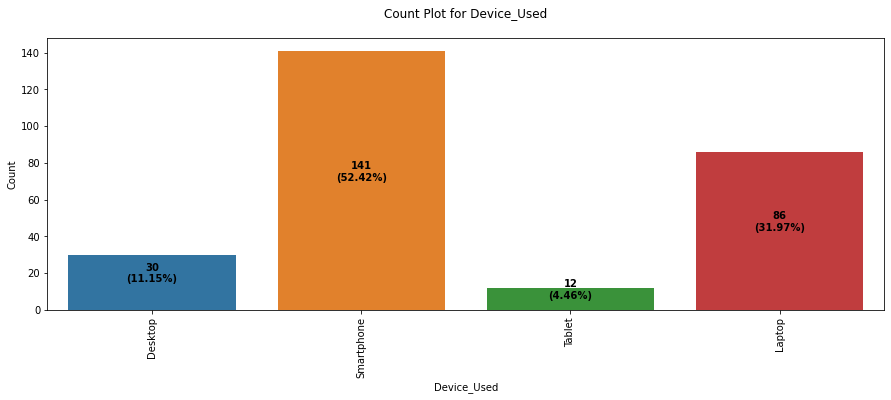

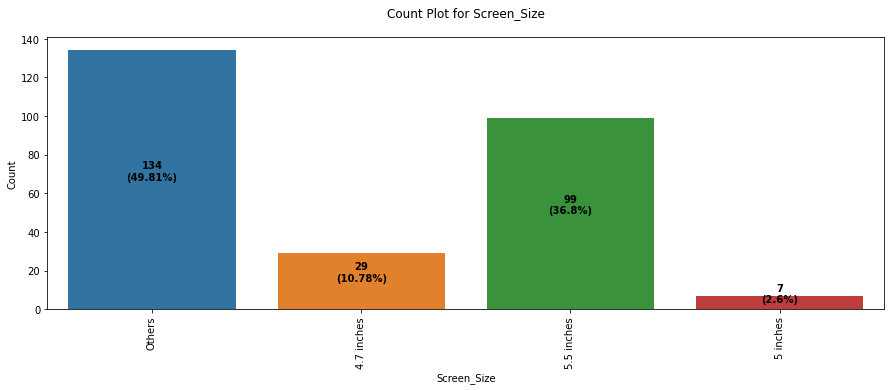

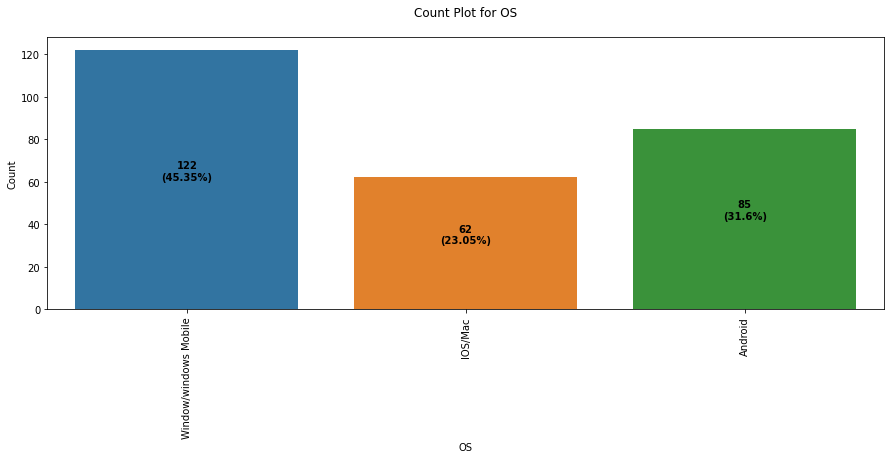

In [54]:
# listing all Categorical data and plotting 
for x in objectColumns[6:9]:

    plt.figure(figsize=(15,5))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Device_Used
    - most of the customers use Smartphone for their purchases, followed by Laptop 
    
    
- Screen_Size
    - most of the customers have opted option others this could be taking into account the size of tablets desktop laptops and few mobile phones, followed by 5.5 inches screen size
    
    
- OS
    - most of the customers use Window/Windows Mobile followed by android 

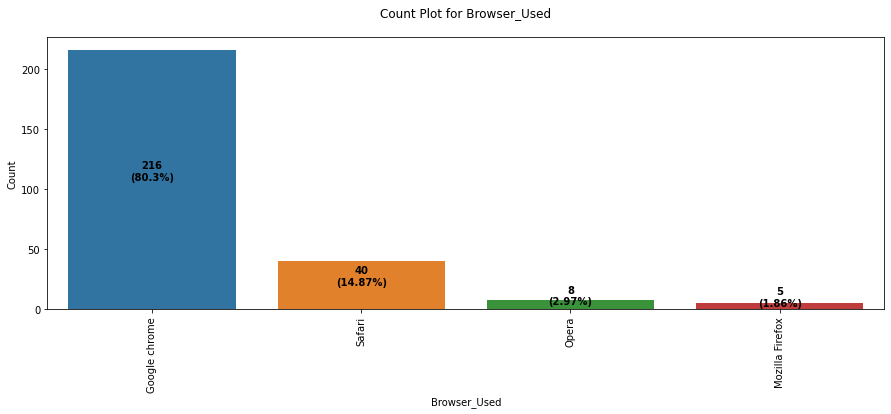

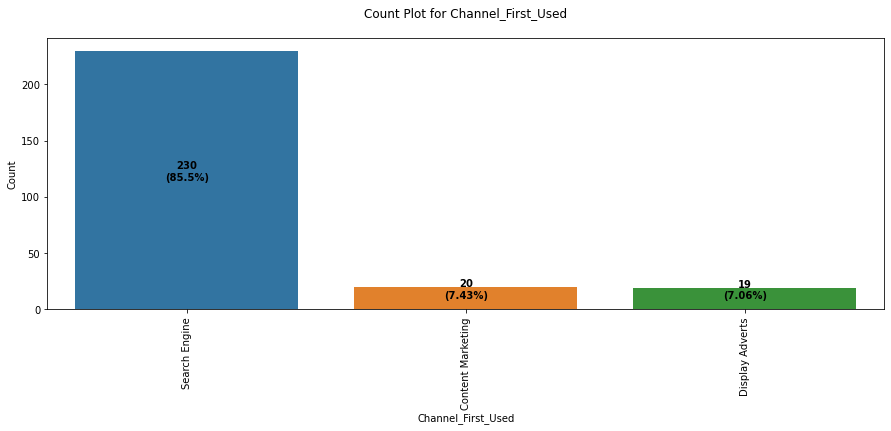

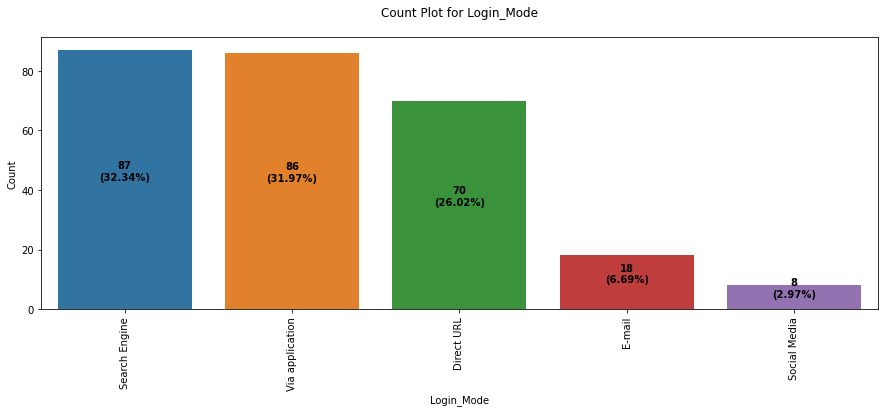

In [55]:
# listing all Categorical data and plotting 
for x in objectColumns[9:12]:

    plt.figure(figsize=(15,5))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Browser_Used
    - most of the customers use Google chrome, followed by Safari 
    
    
- Channel_First_Used
    - most of the customers have used Search Engine to first come across online shopping platform, followed by Content Marketing
    
    
- Login_Mode
    - most of the customers use Search Engine to login followed by application

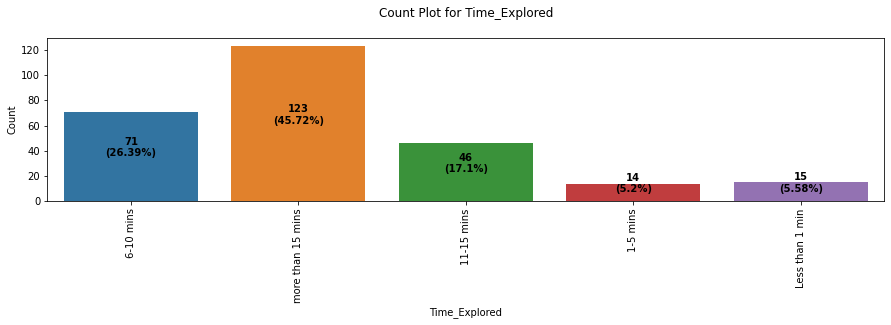

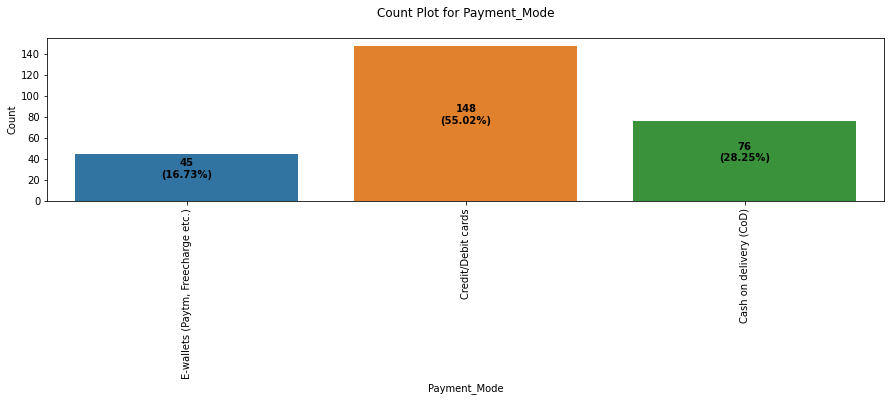

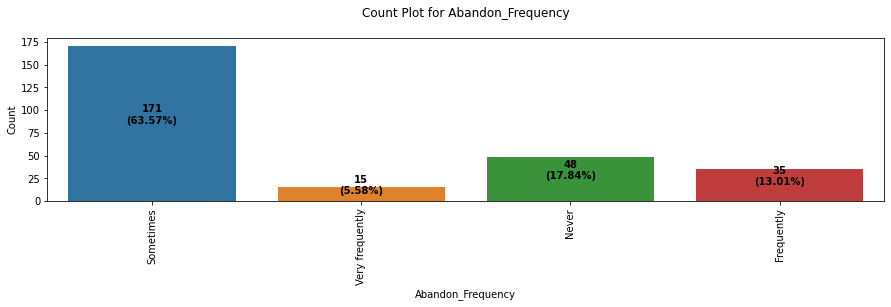

In [58]:
# listing all Categorical data and plotting 
for x in objectColumns[12:15]:
  
    
    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Time_Explored
    - most of the customers have spend more than 15 min to explore for products followed by 6-10 min 
    
    
- Payment_Mode
    - most of the customers prefer Credit/Debit cards as their payment options
    
    
- Abandon_Frequency
    - most of the customers have selected the option sometimes where they abandon the payment after selecting a product, followed by Never

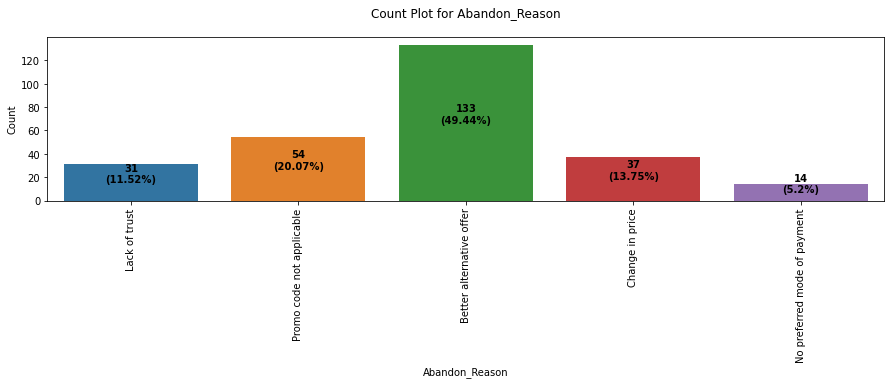

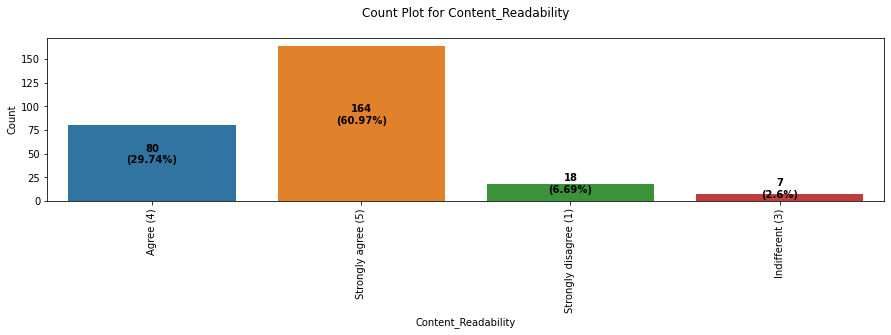

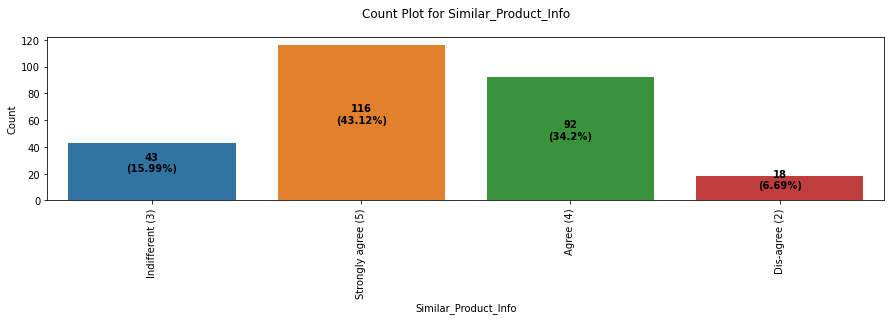

In [60]:
# listing all Categorical data and plotting 
for x in objectColumns[15:18]:

    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Abandon_Reason
    - most of the customers have stated that they abandon the payment because they get better alternative offer, followed by promo code not applicable 
    
    
- Content_Readability
    - most of the customers are able to read and understand the content easily as they have selected the option strongly agree
    - few customers have issues with understanding the content, hence looking at broder perspective the information provided is easy to understand and if possible can be further simplified
    
    
- Similar_Product_Info
    - most of the customers have selected the option strongly agree as they get similar product information
    - few customers have given the option of Dis-agree, shows the system is performing very well

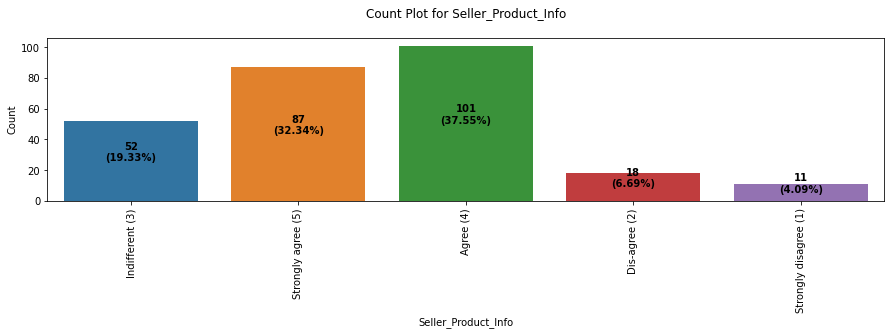

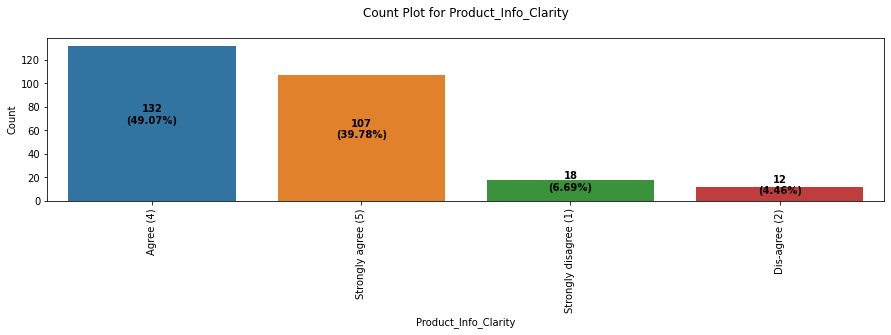

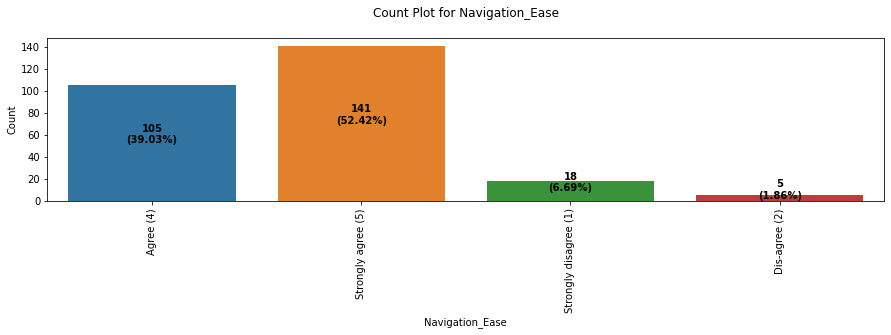

In [61]:
# listing all Categorical data and plotting 
for x in objectColumns[18:21]:

    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Seller_Product_Info
    - most of the customers have stated that they need complete info on the product and sellers while making a purchase on the product
    
    
- Product_Info_Clarity
    - most of the customers have stated that they want all info regarding a product to be listed and easy to understand
    
    
- Navigation_Ease
    - most of the customers wants the web or app to navigate easily

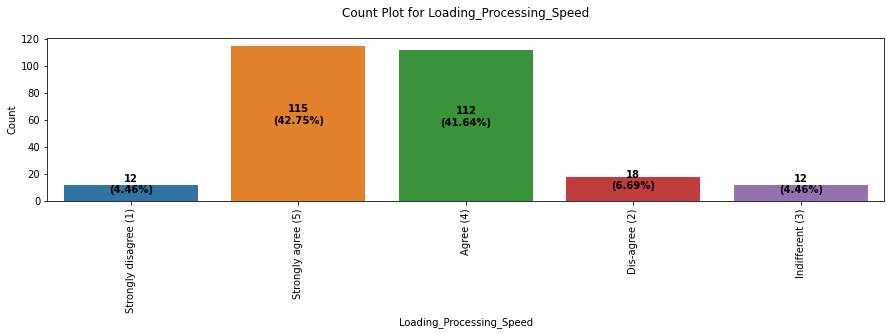

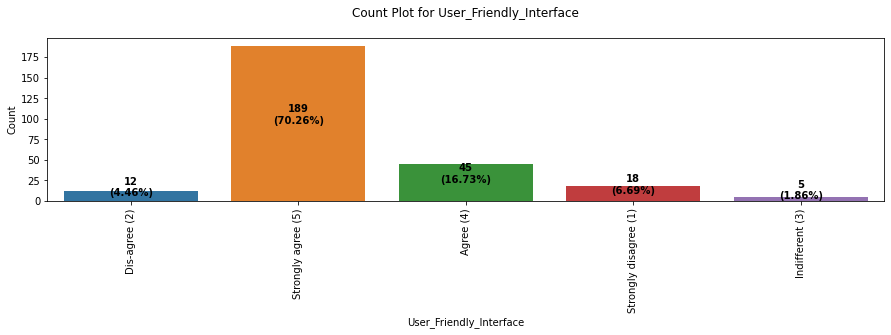

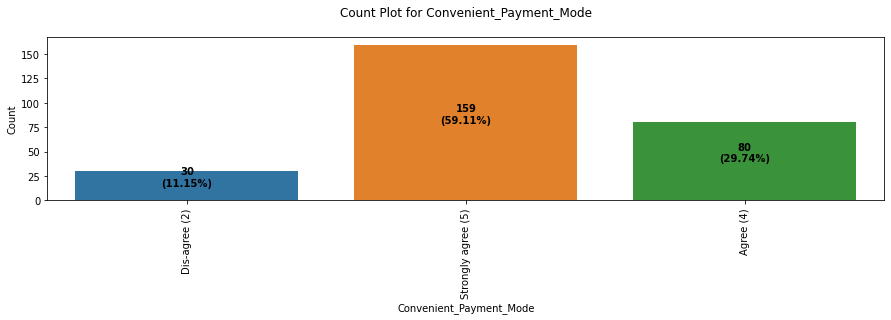

In [62]:
# listing all Categorical data and plotting 
for x in objectColumns[21:24]:

    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Loading_Processing_Speed
    - most of the customers wants the web or app to load and process as fast as possible
    
    
- User_Friendly_Interface
    - most of the customers require userface to be very user friendly
    
    
- Convenient_Payment_Mode
    - most of the customers wants payment method to be as easy as possible

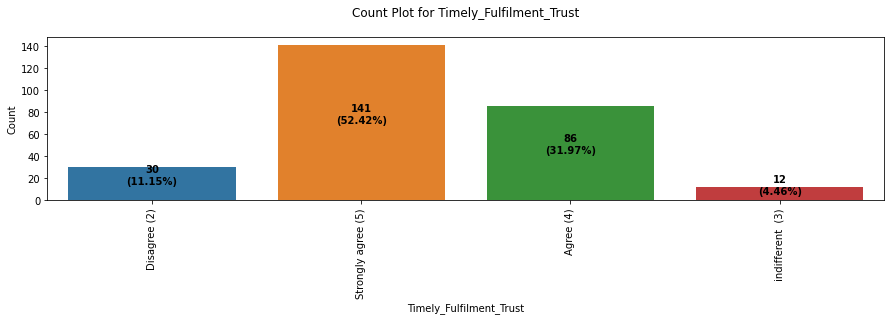

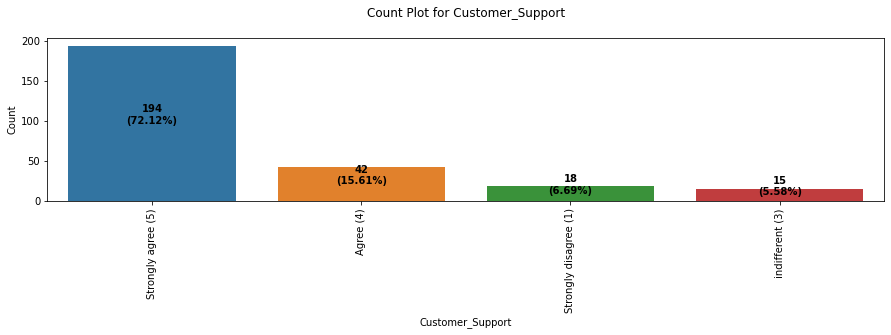

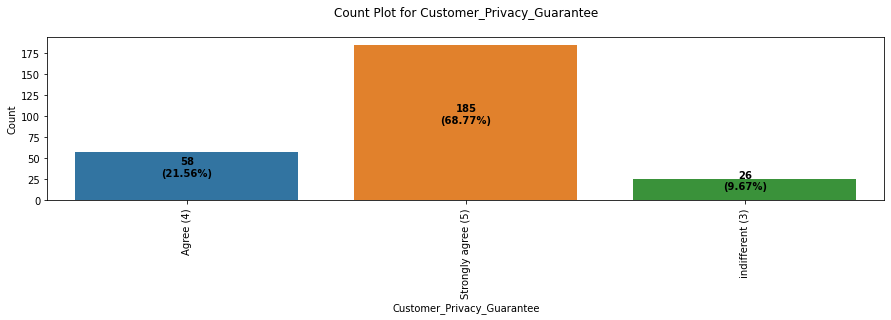

In [63]:
# listing all Categorical data and plotting 
for x in objectColumns[24:27]:

    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Timely_Fulfilment_Trust
    - most of the customers wants their product to fulfill the transactions within the stipulated time
    
    
- Customer_Support
    - most of the customers require very strong customer suport
    
    
- Customer_Privacy_Guarantee
    - most of the customers wants their privacy and prefer those web or app which guarantee it

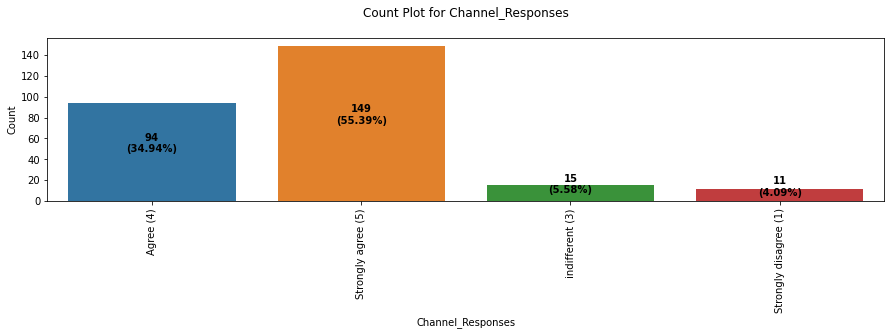

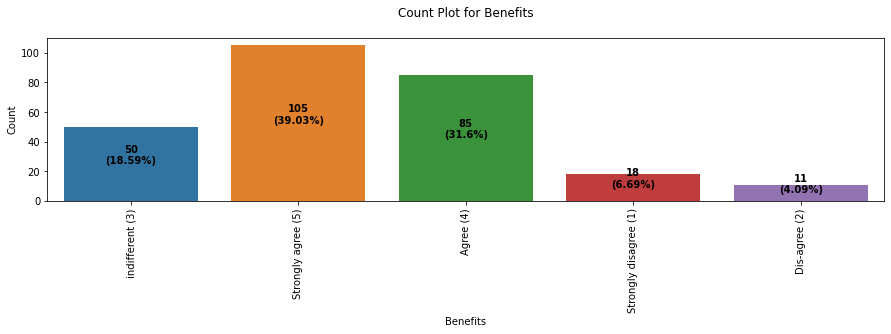

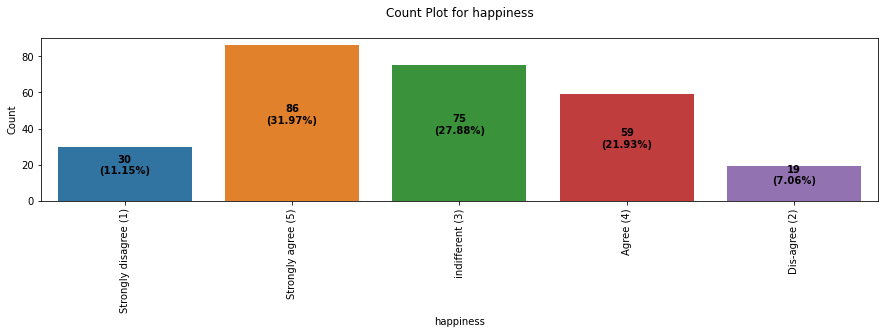

In [64]:
# listing all Categorical data and plotting 
for x in objectColumns[27:30]:

    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Channel_Responses
    - most of the customers requires multiple channel responses
    
    
- Benefits
    - most of the customers require benefits and discounts for being their customers
    
    
- happiness
    - most of the customers get enjoyment by shopping online and only few customers dis-agree to this

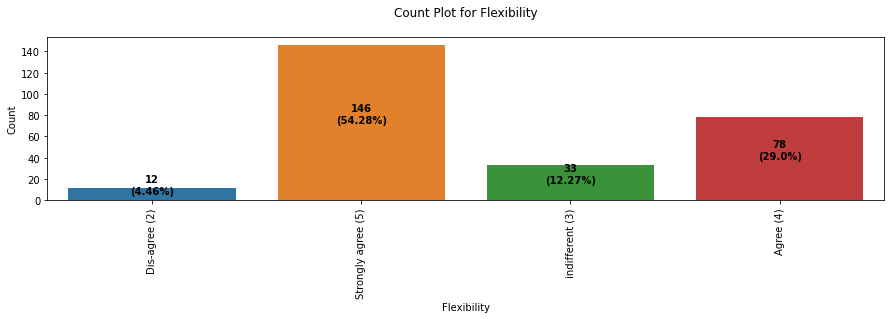

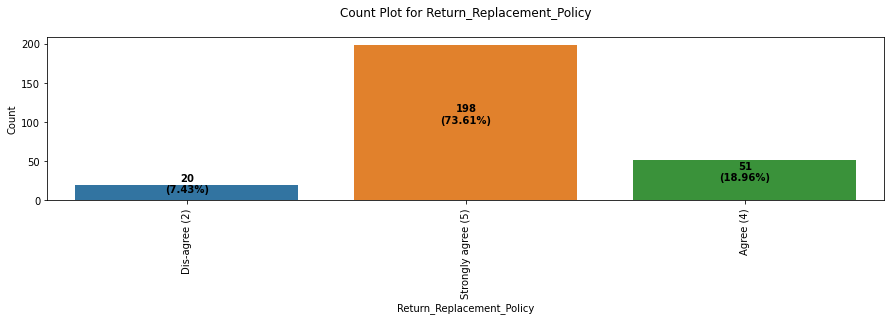

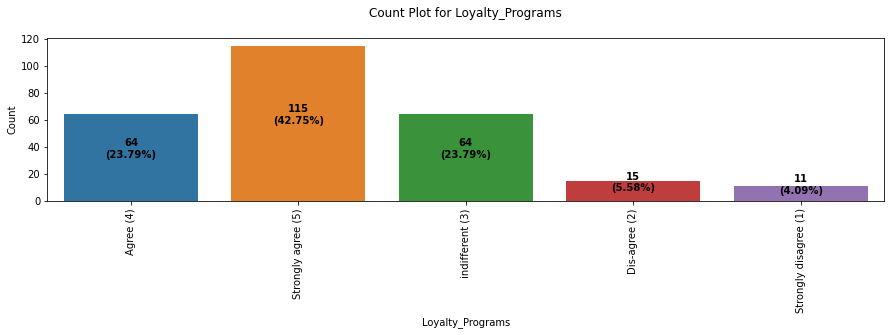

In [65]:
# listing all Categorical data and plotting 
for x in objectColumns[30:33]:

    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Flexibility
    - most of the customers agree that online shopping is convenient and flexible 
    
    
- Return_Replacement_Policy
    - most of the customers are intrested in purchasing products that have return policy
    
    
- Loyalty_Programs
    - most of the customers wants access to loyalty program

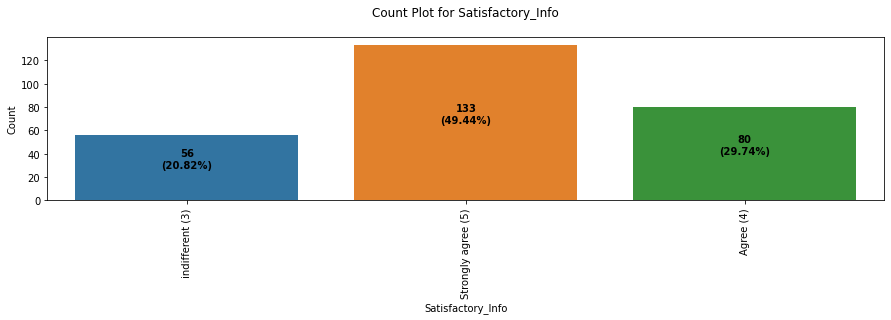

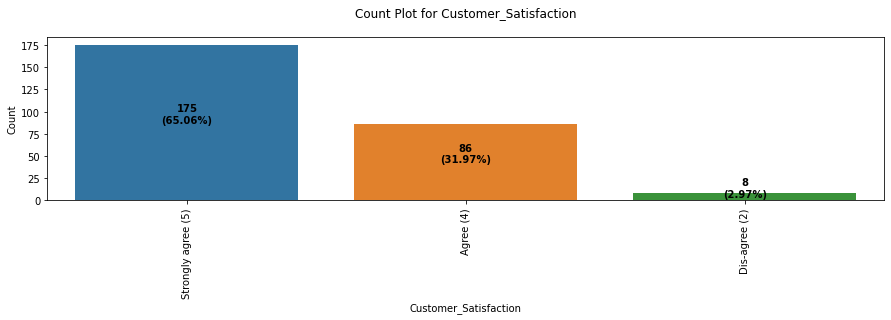

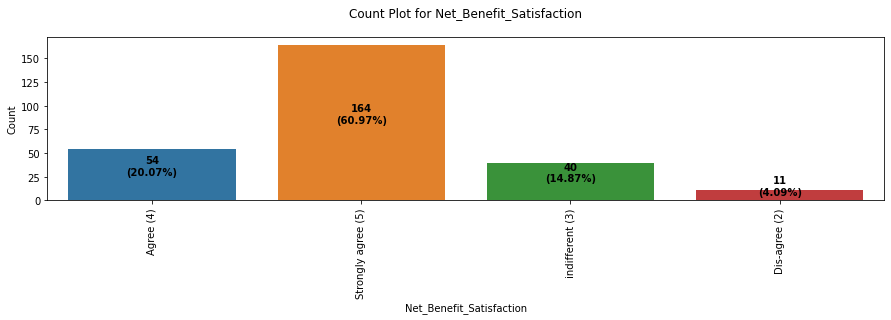

In [66]:
# listing all Categorical data and plotting 
for x in objectColumns[33:36]:

    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Satisfactory_Info
    - most of the customers agree that product info is required to purchase the product, as the image of the product cannot explain all the aspects of the products 
    
    
- Customer_Satisfaction
    - most of the customers are satisfied to shop on website that have good quality
    
    
- Net_Benefit_Satisfaction
    - most of the customers agree that benefit obtained from shopping online can lead to customer satisfaction

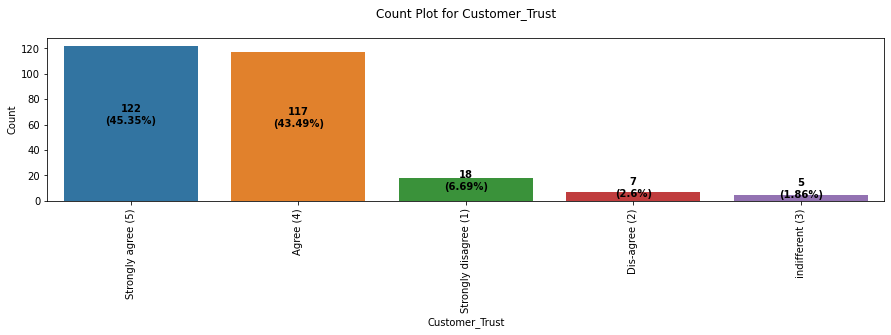

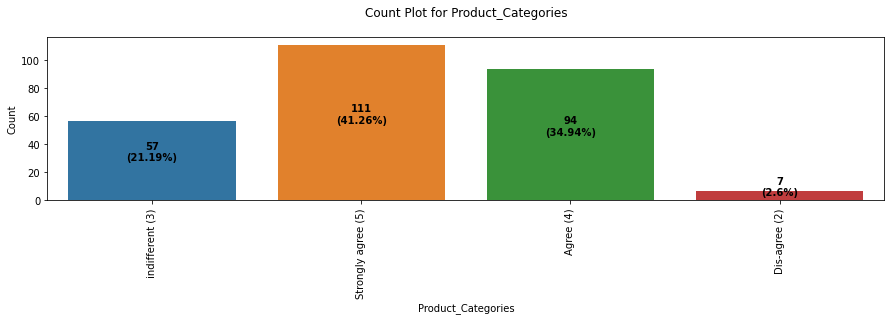

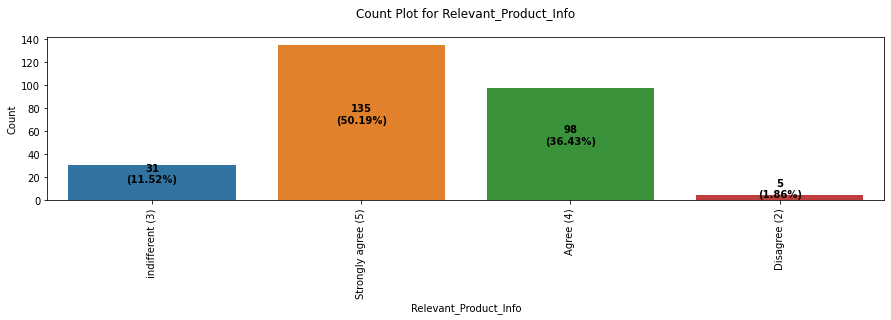

In [67]:
# listing all Categorical data and plotting 
for x in objectColumns[36:39]:

    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Customer_Trust
    - most of the customers agree that, they donot prefer to buy from web or app where trust from the company is not obtained
    
    
- Product_Categories
    - most of the customers require the company to sell wide variety of products
    
    
- Relevant_Product_Info
    - most of the customers agree that company to give results of all relevant products info when customers search for the product

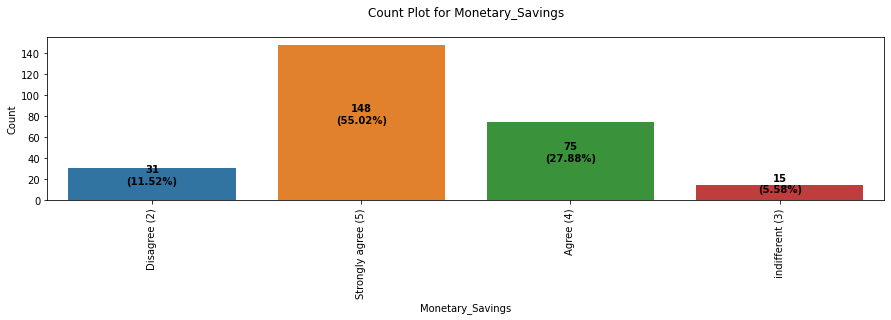

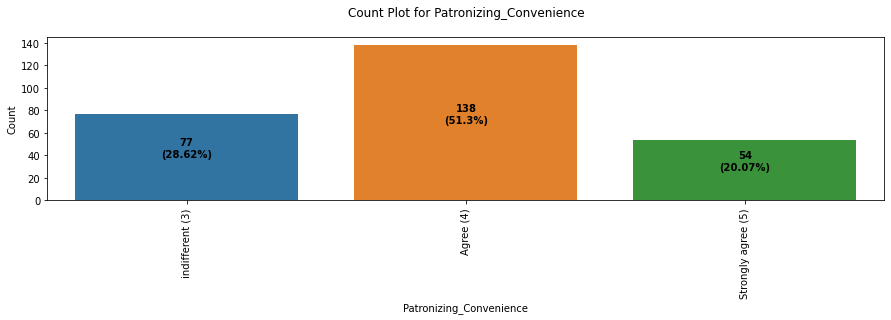

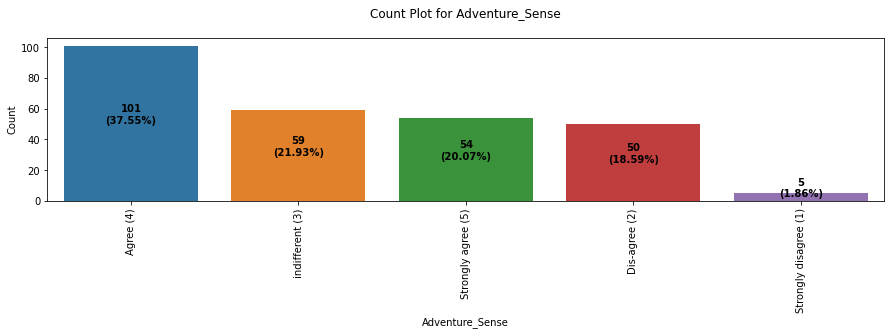

In [68]:
# listing all Categorical data and plotting 
for x in objectColumns[39:42]:
 
  
    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Monetary_Savings
    - most of the customers agree that the customers would prefer to save their money, so inorder for the customers to get attracted or intrested in buying an item it should be offered a discount which the customer is comfortable at buying, by doing so the customer gains a sentimental attachment to the company their by increasing the trust and brand of the company, this is beneficial on the long run and cannot gain in short term basis
    
    
- Patronizing_Convenience
    - most of the customers agree  Convenience of patronizing the online retailers
    
    
- Adventure_Sense
    - most of the customers agree there is a sense of adventure when buying online, the customers are now abe to buy merchandise from different states and from different parts of the world which was no available before, hence they are able to buy their loved ones the things they want

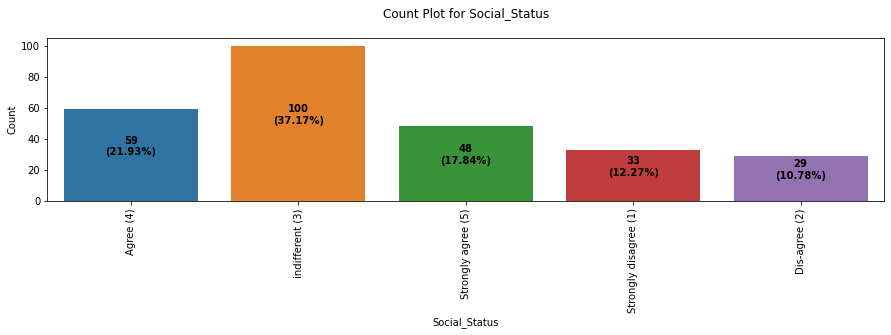

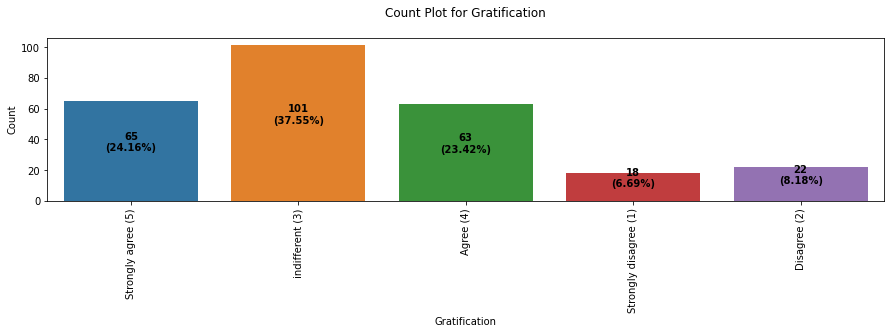

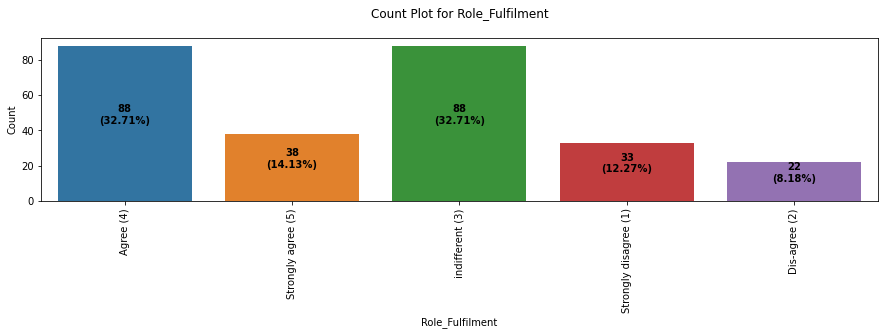

In [69]:
# listing all Categorical data and plotting 
for x in objectColumns[42:45]:

    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Social_Status
    - most of the customers agreed that shopping on preferred e-tailer enhances the social status of the customers
    - followed by a feeling of indifferent
    
    
- Gratification
    - most of the customers agree they felt gratified while shopping on their favourite e-tailer
    
    
- Role_Fulfilment
    - most of the customers agree shopping on the website helps them fulfilling certain roles
    - followed by a felling of indifferent 

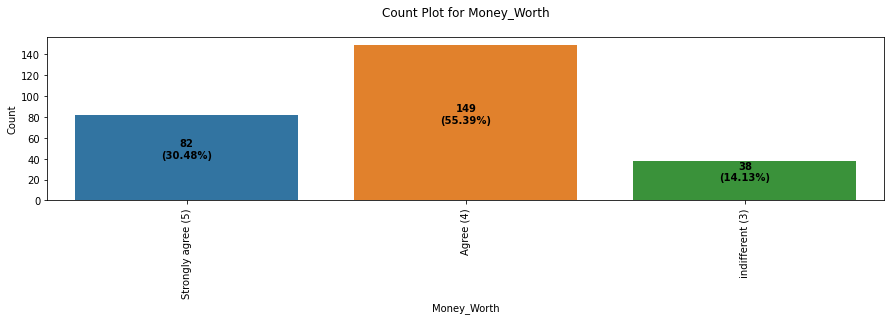

In [70]:
# listing all Categorical data and plotting 
for x in objectColumns[45:46]:
  
    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Money_Worth
    - most of the customers agree that they are getting products worth their money and few of them seems to reject the idea

# Comparison between different online shopping companies

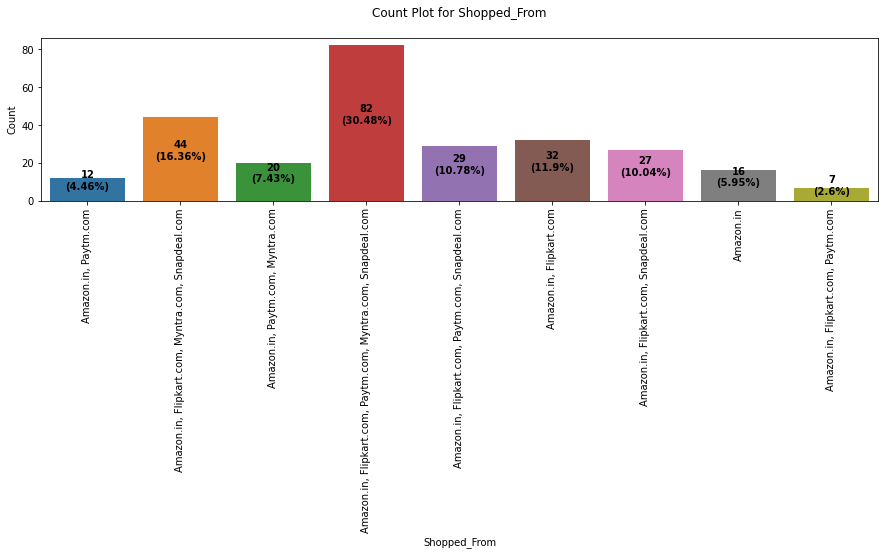

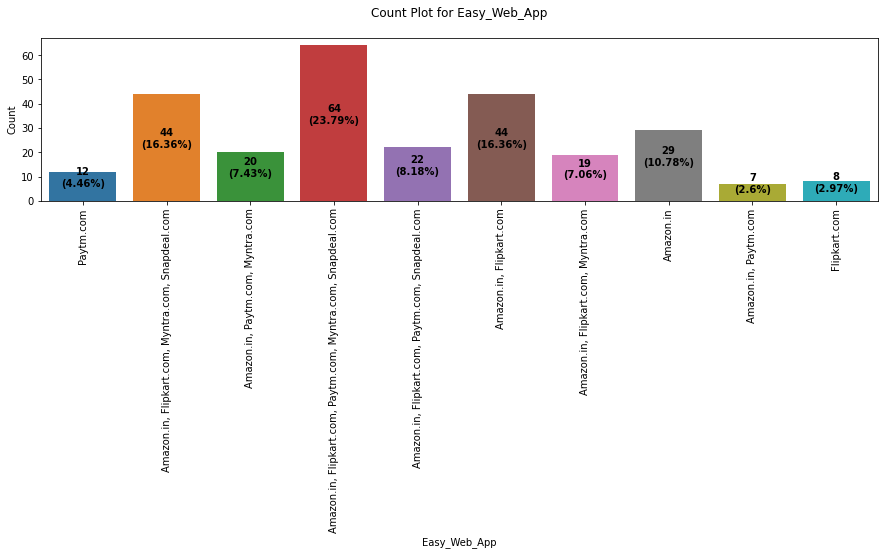

In [71]:
# listing all Categorical data and plotting 
for x in objectColumns[46:48]:
  
    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Shopped_From
    - most of the customers have opted the option Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com
    - individually 
        -customers prefer amazon, followed by flipkart from where customers shop 
    
 
- Easy_Web_App
    - most of the customers have opted the option Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com
    - individually 
        -customers feel that amazon is the easiest webpage to use, followed by flipkart

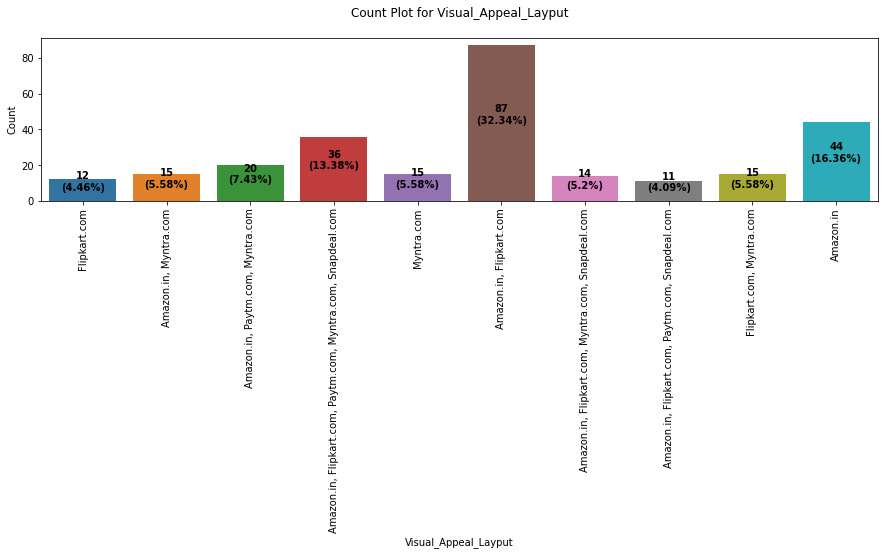

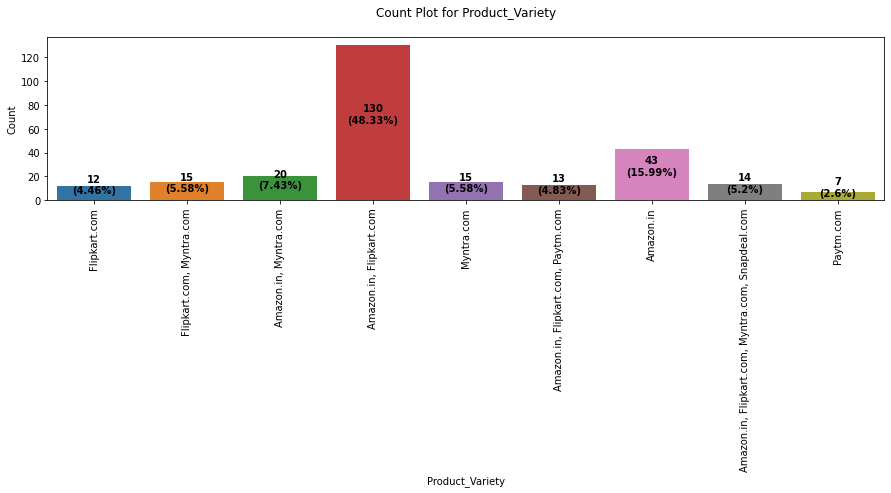

In [72]:
# listing all Categorical data and plotting 
for x in objectColumns[48:50]:
 
    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Visual_Appeal_Layput
    - most of the customers have opted the option Amazon.in, Flipkart.com 
    - individually
        - customers feel that amazon has highest visual appeal, followed by flipkart
        - snapdeal and paytm is least prefered by the customers by visual appeal
    
 
- Product_Variety
    - most of the customers have opted the option Amazon.in, Flipkart.com 
    - individually 
        - amazon provides a large variety of products followed by flipkart
        - snapdeal and paytm provides the least variety of products

Complete_Product_Info
Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete_Product_Info, dtype: int64


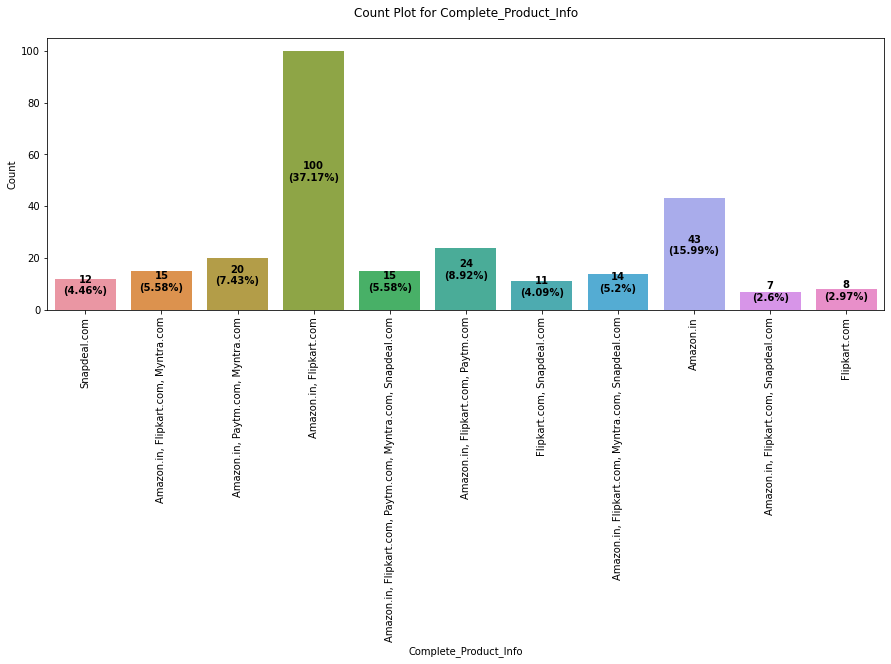

In [37]:
# listing all Categorical data and plotting 
for x in objectColumns[50:51]:
    print(x)
    print(df[x].value_counts())
    plt.figure(figsize=(15,5))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Complete_Product_Info
    - most of the customers opted for Amazon.in, Flipkart.com
    - individually
        - amazon provides complete product info, followed by flipkart
        - snap and paytm doesnt provide lot of complete info of product to ther customers

Fast_Load_Web_App
Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast_Load_Web_App, dtype: int64


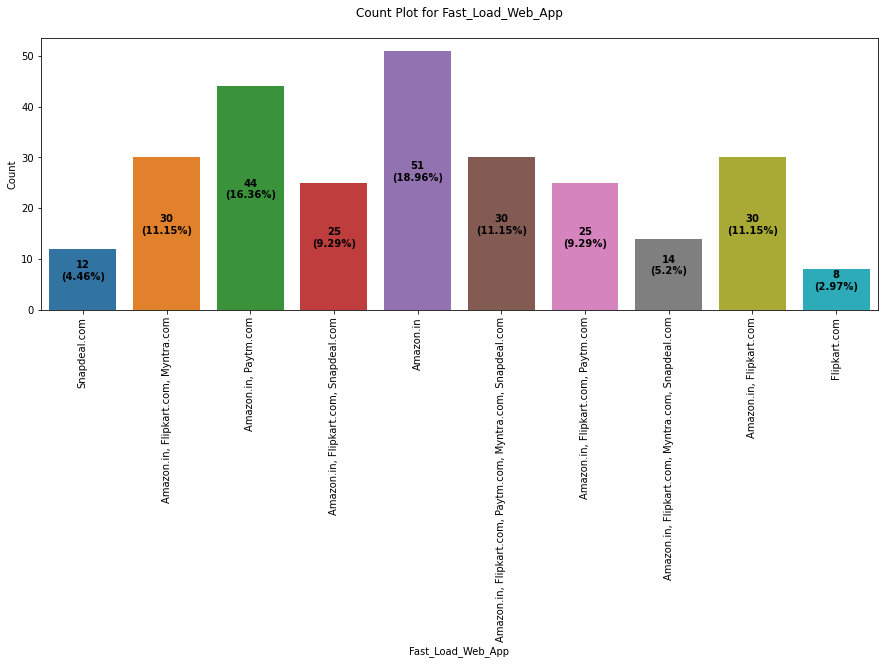

In [38]:
# listing all Categorical data and plotting 
for x in objectColumns[51:52]:
    print(x)
    print(df[x].value_counts())
    plt.figure(figsize=(15,5))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- most of the customer says that amazon loads fast, followed by flipkart
- the slowest among them is myntra followed by snapdeal

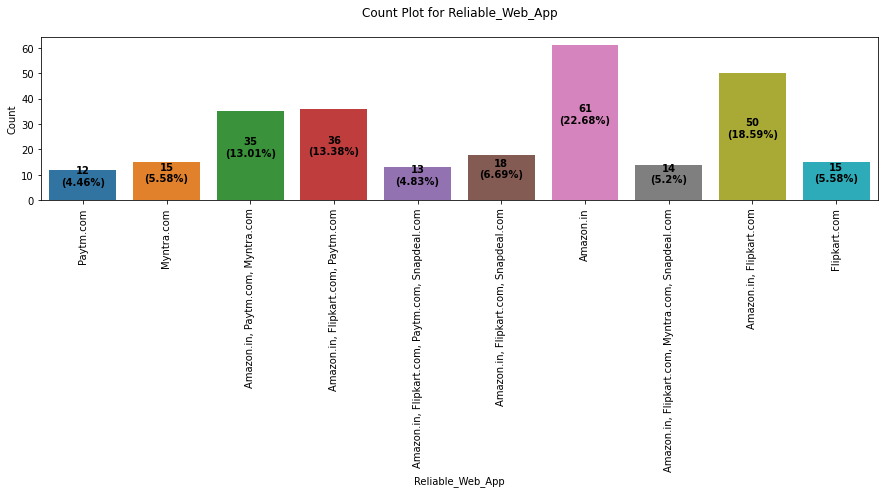

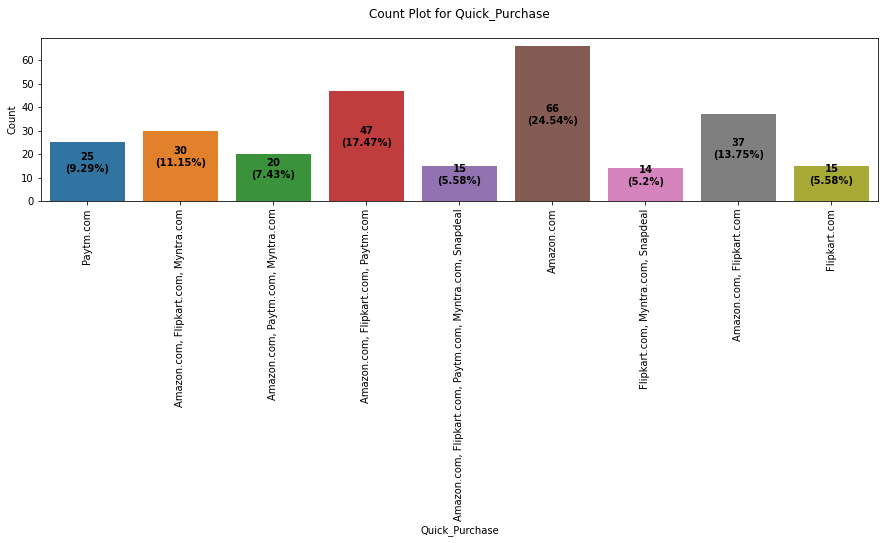

In [73]:
# listing all Categorical data and plotting 
for x in objectColumns[52:54]:

    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Reliable_Web_App    
    - according the customers amazon is the most reliable, followed by flipkart
    - the least reliable is snapdeal followed by myntra


-     Quick_Purchase
    - according to the customers amazon is easy for quick purchase, followed by flipkart
    - snapdeal is not easy for quick purchase followed by myntra

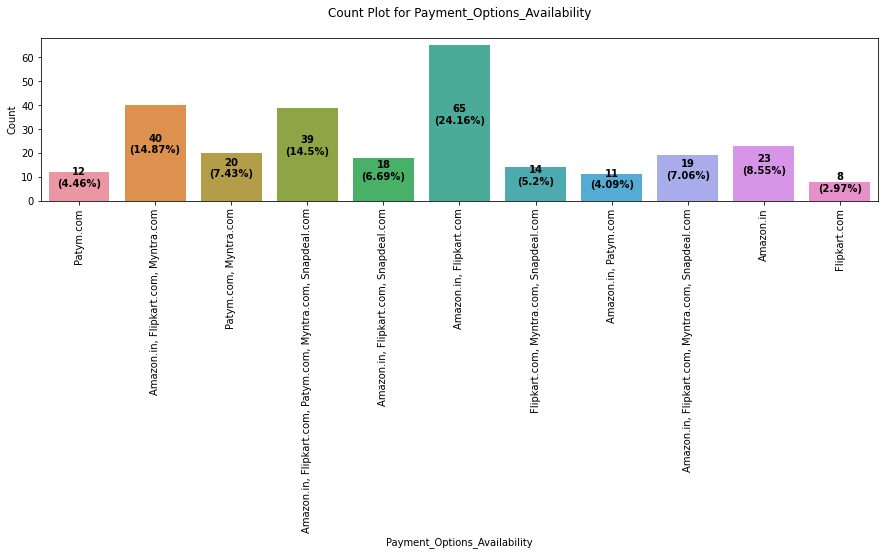

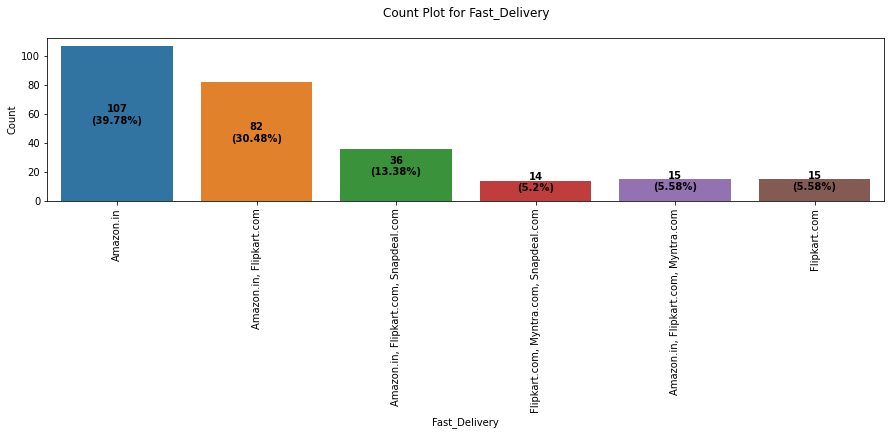

In [74]:
# listing all Categorical data and plotting 
for x in objectColumns[54:56]:
 
    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Payment_Options_Availability
    -  Amazon has more payment option available followed by flipkart
    - paytm has the least payment option followed by snapdeal
    
    
- Fast_Delivery
    - amazon has the fastest delivery followed by flipkart
    - no customer has opted for paytm
    - myntra is least preferred by customer for fast delivery followed by snapdeal

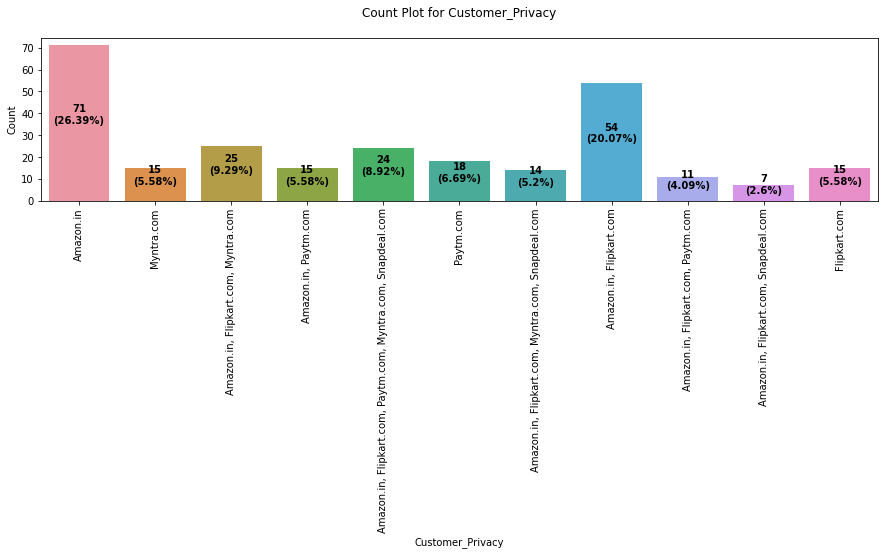

In [76]:
# listing all Categorical data and plotting 
for x in objectColumns[56:57]:
    
    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Customer_Privacy
    - amazon provides high customer privacy, followed by flipkart
    - the least customer privacy according the customer is in snapdeal followed by paytm
    

Financial_Security
Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Financial_Security, dtype: int64


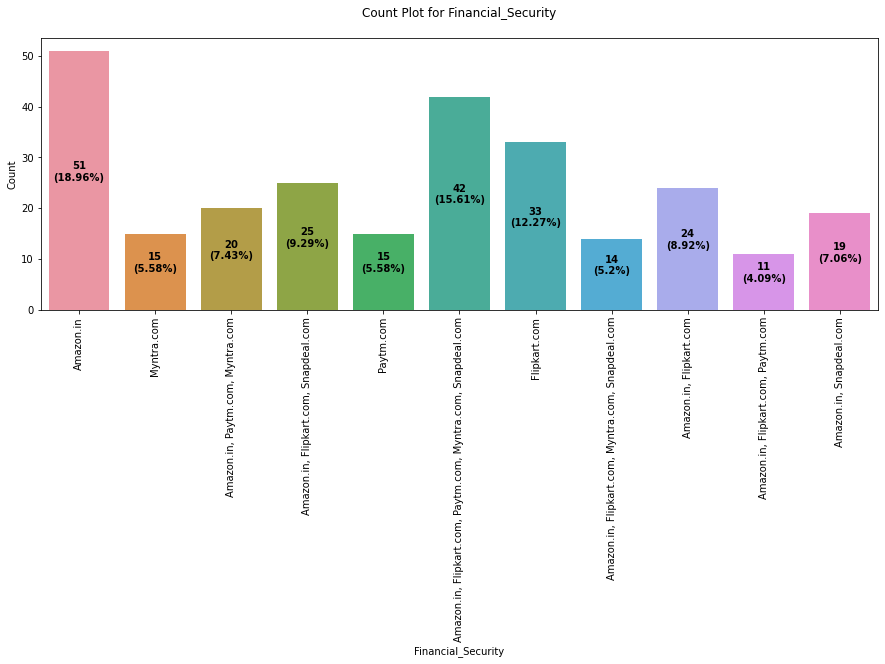

In [42]:
# listing all Categorical data and plotting 
for x in objectColumns[57:58]:
    print(x)
    print(df[x].value_counts())
    plt.figure(figsize=(15,5))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()


    
- Financial_Security 
    - according to the customers amazon provides best financial security followed by flipkart
    - least provided by paytm

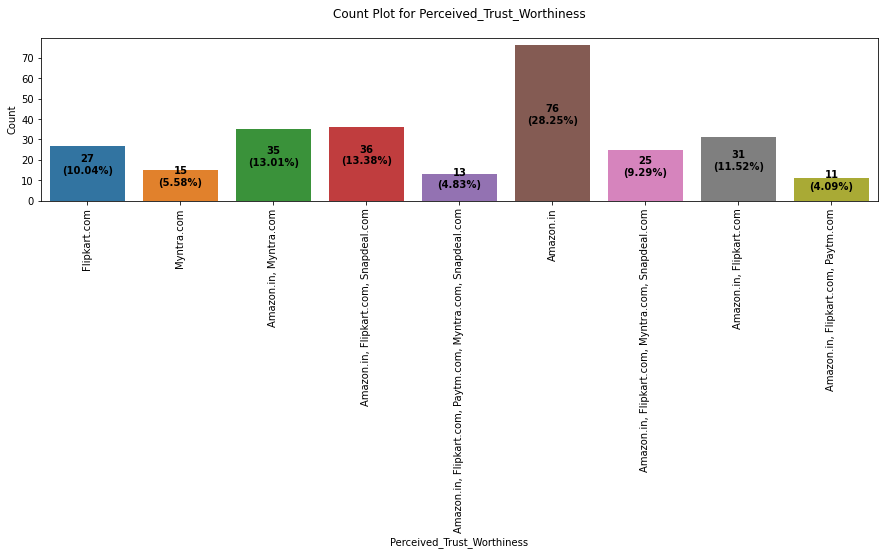

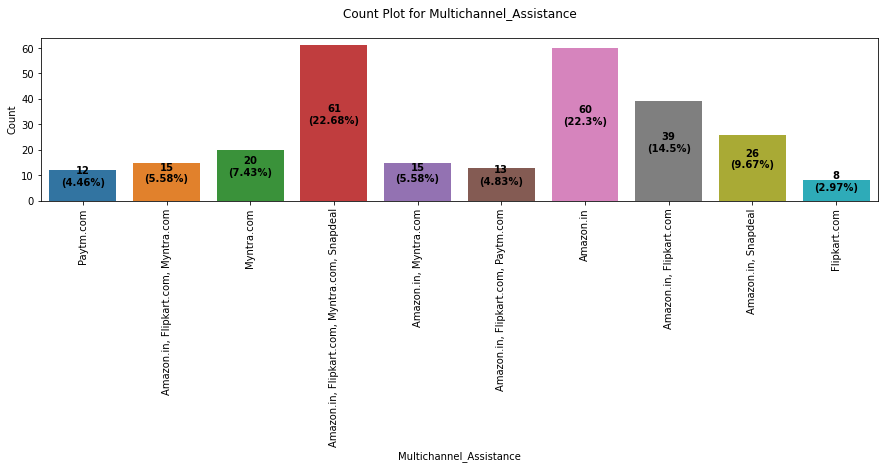

In [77]:
# listing all Categorical data and plotting 
for x in objectColumns[58:60]:
   
    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Perceived_Trust_Worthiness
    - according the customers amazon has the highest percieved trust worthiness followed by flipkart
    - least is by paytm followed by myntra
    
    
- Multichannel_Assistance 
    - according to customers amazon provides better multichannel assistance followed by flipkart
    - least multichannel assistance is offered by paytm followed by snapdeal

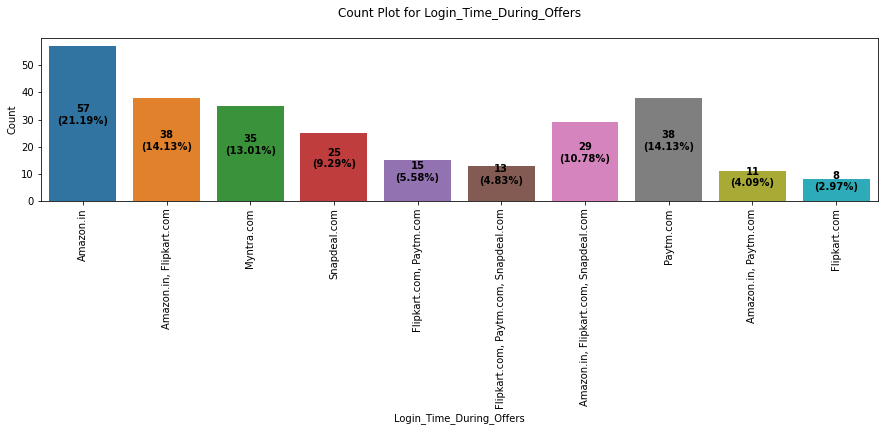

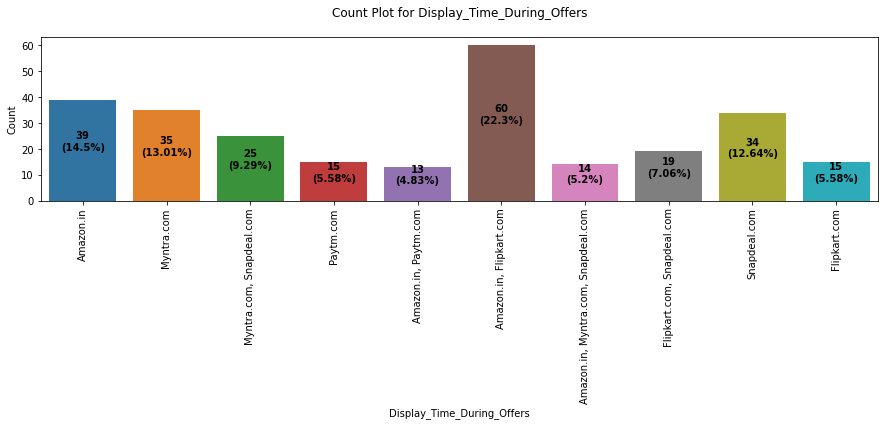

In [78]:
# listing all Categorical data and plotting 
for x in objectColumns[60:62]:
   
    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Login_Time_During_Offers
    - according the customers login time during offers is less for myntra, followed by snapdeal
    - login time during offers is longer in amazon followed by flipkart
    
- Display_Time_During_Offers
    - paytm takes the least time for displaying products or loading wepage during offers, followed by myntra
    - amazon takes the lot of time for the webpage to load during offers followed by flipkart

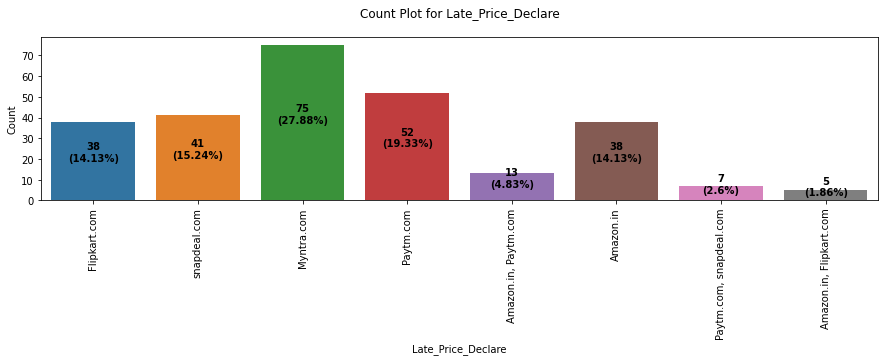

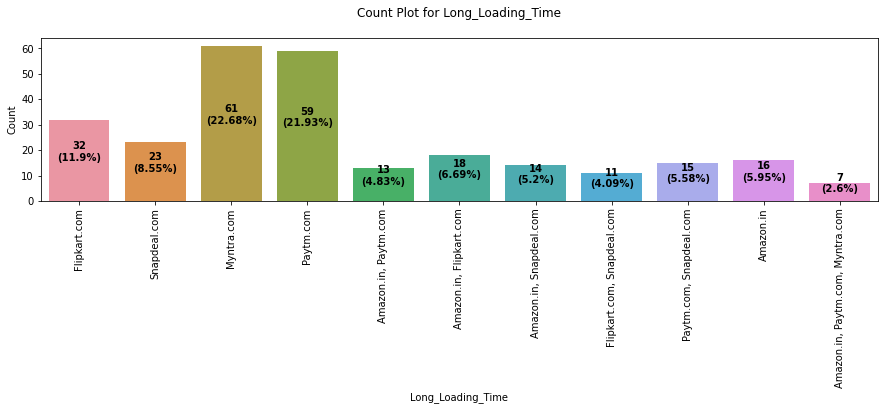

In [79]:
# listing all Categorical data and plotting 
for x in objectColumns[62:64]:
    
    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Late_Price_Declare
    - flipkart declares the prie as early as possible followed by snapdeal
    - myntra declares the price the last followed by paytm
    
-  Long_Loading_Time
    - amazon and flipkart has the least loading time 
    - paytm followed by myntra has the longer loading time

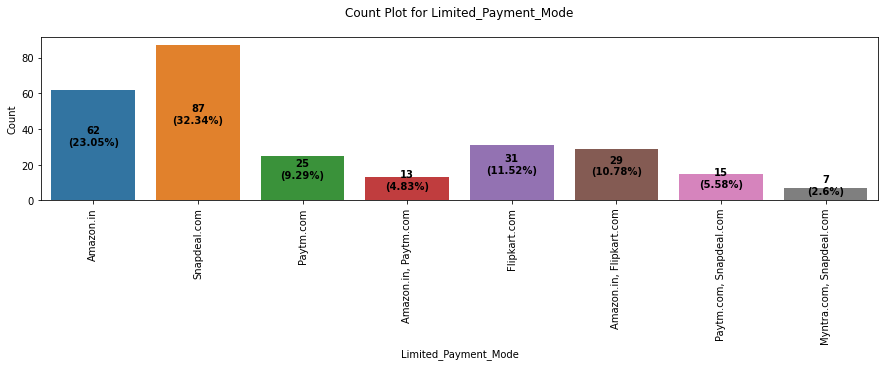

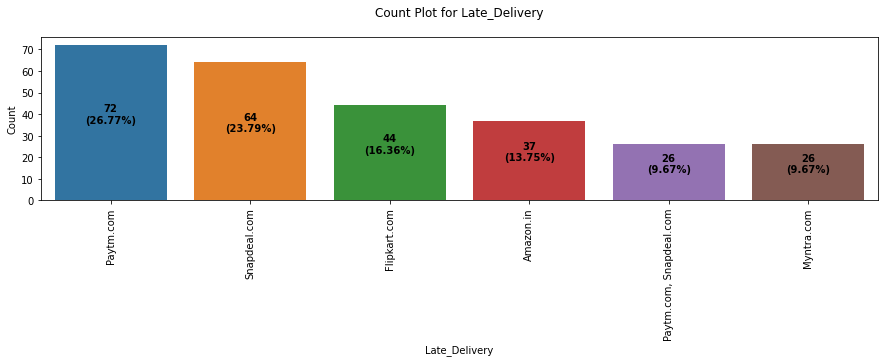

In [80]:
# listing all Categorical data and plotting 
for x in objectColumns[64:66]:
  
    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Limited_Payment_Mode
    - myntra followed by paytm has very limited mode for payment
    - snapdeal followed by amazon provide wider payment mode
    
- Late_Delivery
    - most of the customer opted that paytm with late delivey, followed by snapdeal
    - myntra has the least late delivery followed by flpikart

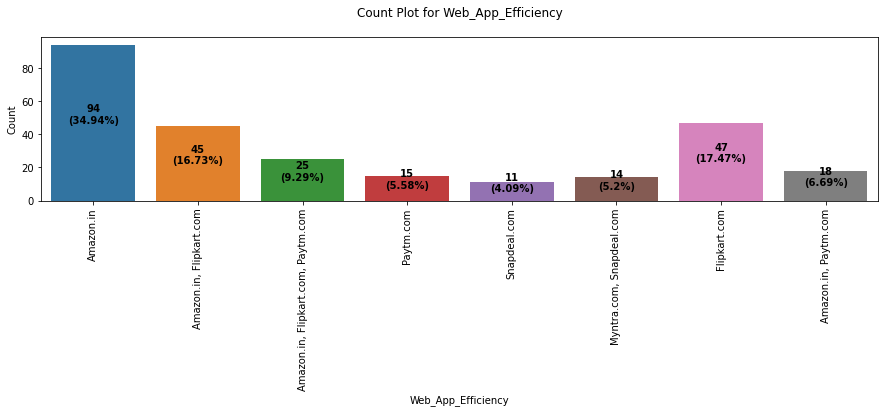

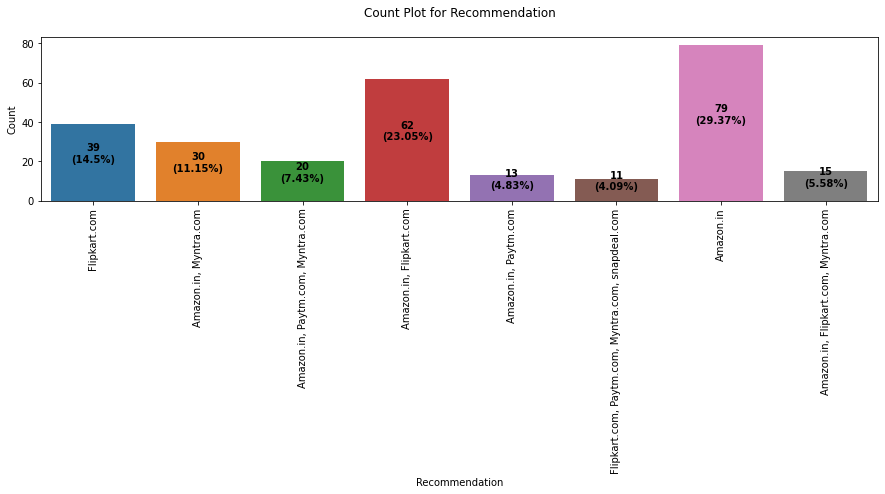

In [81]:
# listing all Categorical data and plotting 
for x in objectColumns[68:70]:
   
    plt.figure(figsize=(15,3))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.xticks(rotation=90)
    plt.show()

- Web_App_Efficiency
    - amazon has the best web or app efficeny, followed by flipkart
    - myntra has the least web or app efficency followed by snapdeal
    
- Recommendation
    - amazon has the highest recommendation followed by flipkart
    - snapdeal has the least recommendation followed by paytm

#### Conclusion from comparing different service providers

- Amazon
    - improvements needed
        
        - amazon struggles during offer period, customers face difficulty to login and for web page to load during offers
            - this is mainly because of high traffic which occurs because it has large no. of customers compared to other service providers
            - solution can be by increasing bandwidth or by further optimising the website

        - amazon should try to announce price for producrs during offers as early as possible this can further help the customers who shop in other websites to be slowly included, but there is another risk which should be taken into account that would be rival companies could try to sell the same product at more cheaper price so study should be done on when the price declaration should be done during offers
        
    - Amazon is preferred by most of the people and has one sided dominance when compare with others        

- Flipkart
    - Improvements needed
       
        - struggles during offer period, customers face difficulty to login and for web page to load during offers
            - this is mainly because of high traffic which occurs because it has large no. of customers compared to other service providers
            - solution can be by increasing bandwidth or by further optimising the website
           
        - should provide no. of options for payment
        
    - flipkart has the second largest no. of customers and it can be seen that its the second best service provider, it has lots of wrok to done inorder to be at the top, in most of the cases it has rank 2 except for late price declaration where it declares its price as early as possible and got rank 1    

- Myntra
    - Improvements needed
        - it has problems with reliablity with the website 
        - it doesnt have quick purchase option or needs to make changes so customers can buy the product by entering the details as less as possible 
        - it doesnt deliver product very fast so needs to work on logistics and pprovide training to personal and automate some process to deliver the products within the delivery day and avoid late delivery
        - customers dont trust mytra so i needs to work on how to get the trust from customers
        - needs to provide multichannel assistance, because it can be frustrating when customers dont get their querries resolved within the stipulated time 
        - needs to decalare prices during offers as early as possible to attract customers
        - needs to wrok on their website to increase efficency and decrease loading time
        
    - during offers compared to others its easier to login and website load faster
    
        

- Snapdeal
    - Improvements needed
        - needs to wrok on introducing a wide variety of products and provide all the relevant info regarding the product 
        - website needs to efficent, less loading time, needs to be more reliable
        - needs to provide quick purchase options where customers have to enter the least amount of details to purcjase an item
        - needs to provide wide variety of payment options
        - needs to work on customer privacy
        - it doesnt deliver product very fast so needs to work on logistics and pprovide training to personal and automate some process to deliver the products within the delivery day and avoid late delivery
        - needs to provide multichannel assistance, because it can be frustrating when customers dont get their querries resolved within the stipulated time 
    
    - during offers compared to others its easier to login and website load faster 
        

- Paytm
    - Improvements needed
        - needs to wrok on introducing a wide variety of products and provide all the relevant info regarding the product 
        - website needs to efficent, less loading time, needs to be more reliable, reduce the laoding time
        - needs to provide wide variety of payment options
        - needs to offer a sense of financial security
        - needs to provide multichannel assistance, because it can be frustrating when customers dont get their querries resolved within the stipulated time 
         

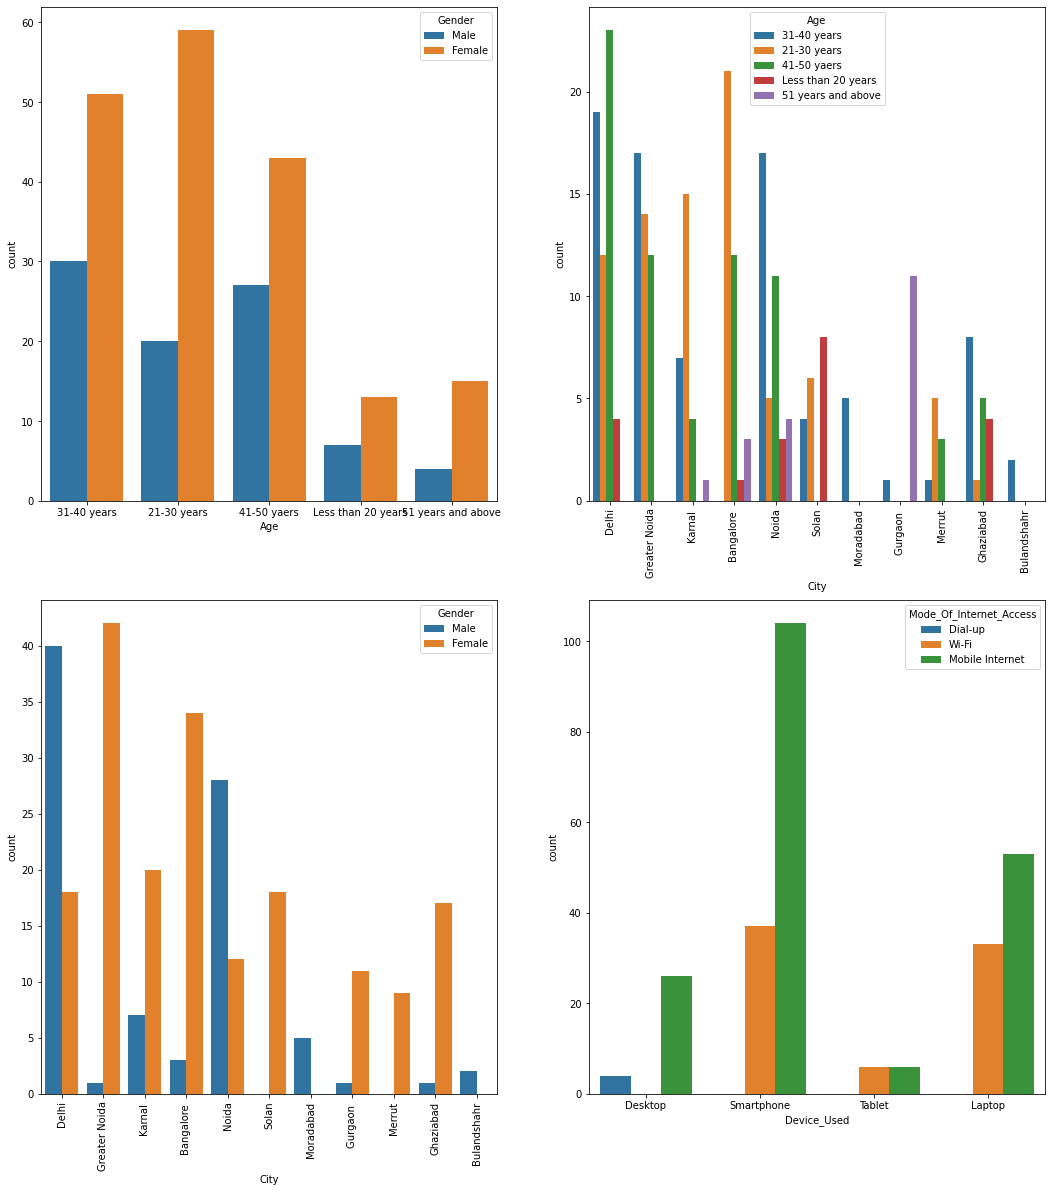

In [48]:
plt.figure(figsize=[18,20])
plt.subplot(2,2,1)
sns.countplot(df['Age'],hue=df['Gender']);
plt.subplot(2,2,2)
sns.countplot(df['City'],hue=df['Age']);
plt.xticks(rotation=90);
plt.subplot(2,2,3)
sns.countplot(df['City'],hue=df['Gender']);
plt.xticks(rotation=90);
plt.subplot(2,2,4)
sns.countplot(df['Device_Used'],hue=df['Mode_Of_Internet_Access']);


- Age and Gender
    - in all age group femlaes were active participants for the survey
    
    
- Age and City
    - Delhi had customers belonging to 31-40 and 41-50 age group the most
    - Greater Noida had customers mostly in the age group 21-30 and 31-40 the most
    - Kamal had customers mostly in the age group 21-30
    - Banglore had customers mostly in the age group 21-30
    - Noida had customers mostly in the age group 31-40
    - Solan had less no of people overall and had people belonging to less than 19 the most
    - Moradabad, Merrut, Ghazibad Gurgaon and Bulandhr had very less people so an awarness about this should be spread in order to get more customers
    
    
- Gender and City 
    - only delhi and moradabad has more no of men, Merrut there is no male customers
    - rest all are female dominant city and Morradabad has no female customers    
    
    
- Device Used and mode of internet access
    - most of the people use smartphone with mobile data followed by using wifi
    - tablet and desktop is the least used for purchasing products on the websites    
 

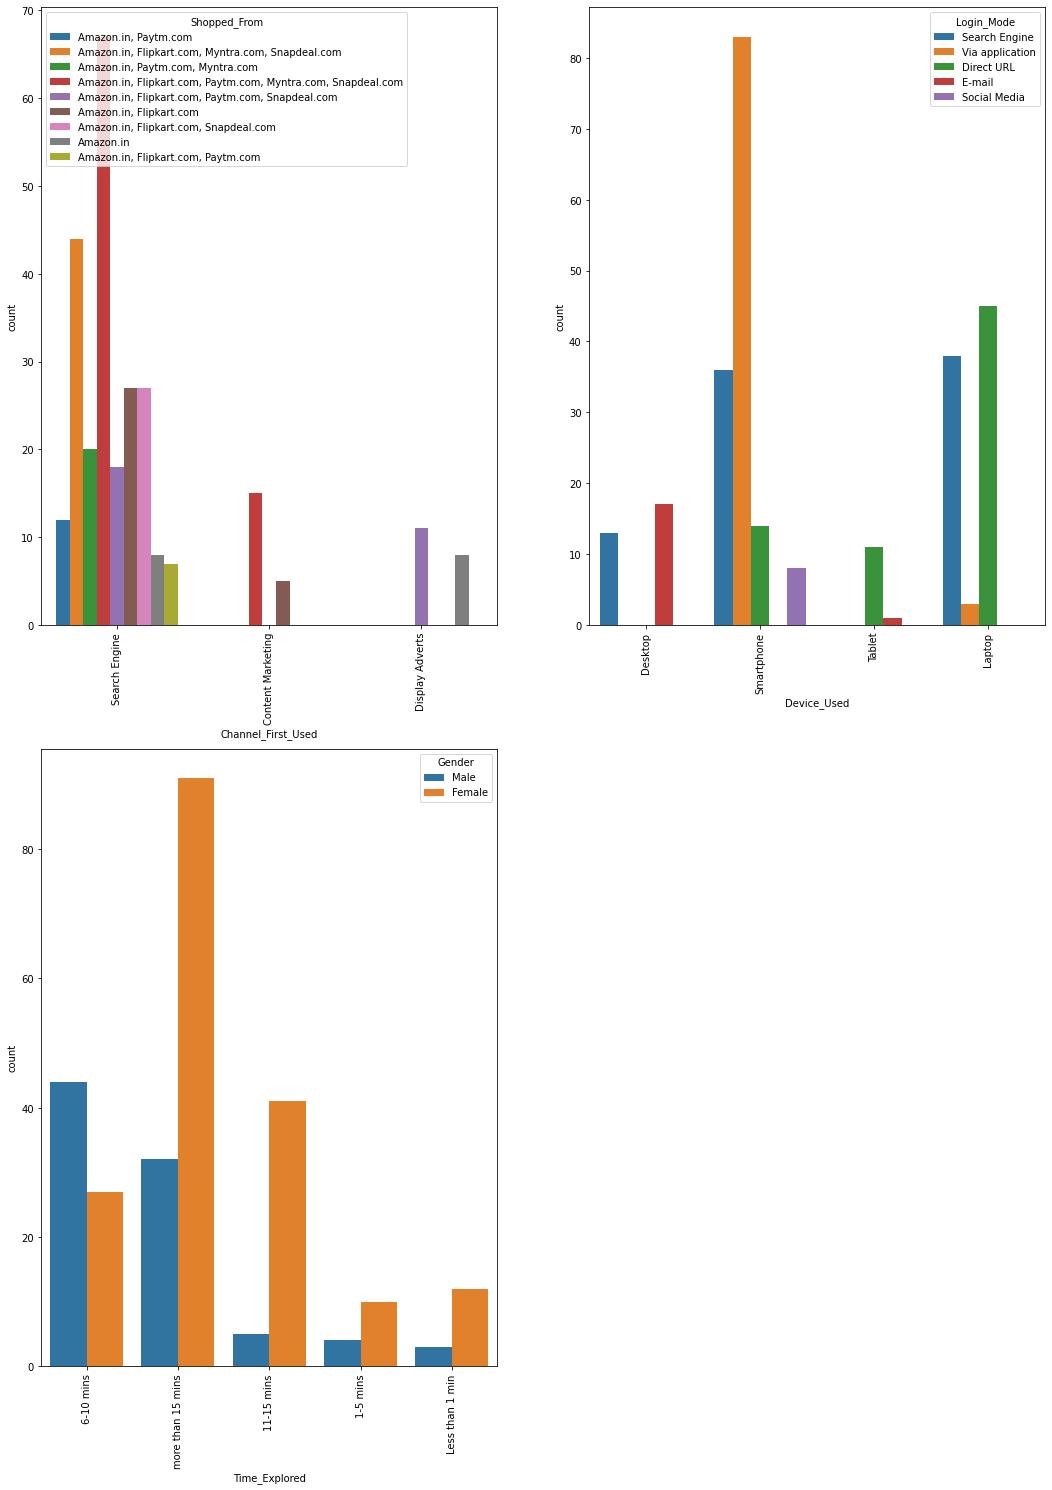

In [49]:
#'Browser_Used','Channel_First_Used','Login_Mode','Time_Explored'
plt.figure(figsize=[18,25])

plt.subplot(2,2,1)
sns.countplot(df['Channel_First_Used'],hue=df['Shopped_From']);
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.countplot(df['Device_Used'],hue=df['Login_Mode']);
plt.xticks(rotation=90);
plt.subplot(2,2,3)
sns.countplot(df['Time_Explored'],hue=df['Gender']);
plt.xticks(rotation=90);

- Shopped from and channel first used
    - most of the customers used search engine so investments can be made in web browsers to provide adv regarding offers as people surf the net 
    - content marketting and display adv has very little influnce
    
    
- Device used and mode of login
    - most commnly used method is to login to app via smartphone, then using laptop to login via direct url or search engine
    
    
- Time explored and Gender
    - males explore only for 6-10 min
    - large amount of time is spend by female

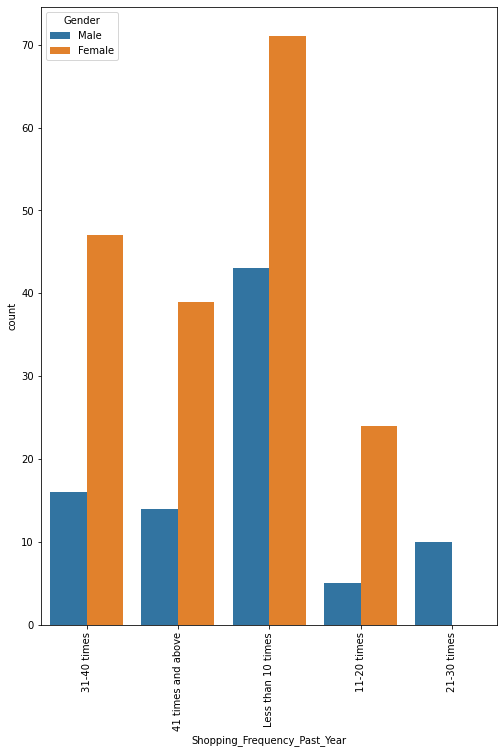

In [50]:
plt.figure(figsize=[18,25])
plt.subplot(2,2,1)
sns.countplot(df['Shopping_Frequency_Past_Year'],hue=df['Gender']);
plt.xticks(rotation=90);


- Shopping_Frequency_Past_Year and Gender
    - males have searched less than 10 
    - females have searched alot compared to male 


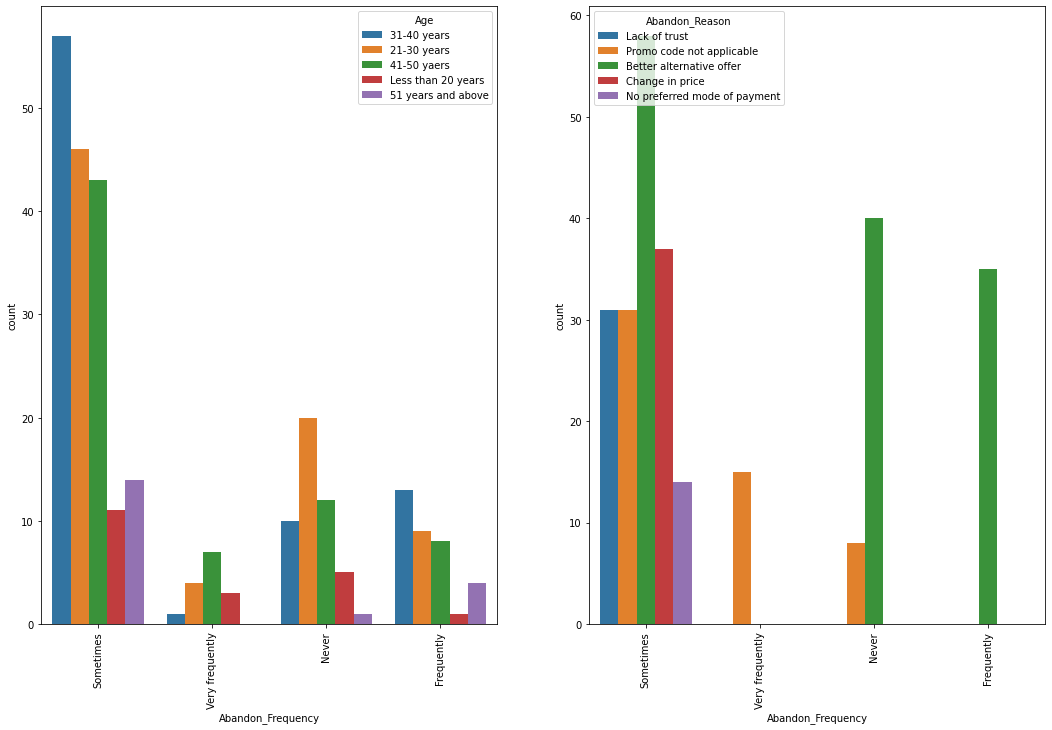

In [51]:
plt.figure(figsize=[18,25])
plt.subplot(2,2,1)
sns.countplot(df['Abandon_Frequency'],hue=df['Age']);
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.countplot(df['Abandon_Frequency'],hue=df['Abandon_Reason']);
plt.xticks(rotation=90);

- Abandon_Frequency and Abandon_Reason
    - Sometimes option selected because of better alternative offers
    - Very frequently option selected as there is no promo code applicable
    - Frequently option selected as there is better alternative offers

# Inferences

- Helped in understanding the expectation of the customers from the company in which they shop, based on these understanding a lot of changes can be incoperated to make best online shopping experience for the customers 

- some of the areas where companies need to focus is on customer data privacy, providing customer satisfaction, customer loyalty etc

- Many customers are deeply frustrated when they are not able to purchase the desired products during offer days, and when loading time of webpage increases 

- Customers are intrested in buying products only if all the required details of the products are present and relevant seller info is provided

- Trust from customers can be gained in many ways, one way is to deliever the products on time, maintaining high customer data privacy and providing loyalty programms, introducing wide variety of products

- There are few cities where customers are very low, in such cities people must have awarness class regarding it

- Most of the people have access to smart phone and mobile data, hence its not difficult to get more customers, but doesnt purchase products frequently and the no. of times the cutomers search for products is also not high

- The sellers should ask for feedback from the customers inorder to know further on how to improve, as there is always a chance for a mixup with delivery and can frustrate the customers

- Amazon is the most prefered online retailer in the current market followed by flipkart

#### Conclusion

- able to understand the customer behaviour to online shopping is positive as it is clear that the no of customers are slowly increasing 

- amazon is the most prefered online retailer followed by flipkart 

- consumers purchasing decisions were dependent on various factors

- most of the customers doesnt prefer online shopping this could be considering the fact of privacy and online transactions which makes the customers nervous